# **A Novel Web Framework for Cervical Cancer Detection System A Machine Learning Breakthrough**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score

In [2]:
df = pd.read_csv('cervical-cancer_csv.csv')

In [3]:
#Let's print the first 5 records of the data set
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
#Let's print the last 5 records of the dataset
df.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
834,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.50,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
#Let's print the column name
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [6]:
# shape of the dataset
df.shape

(835, 36)

In [7]:
df.duplicated().sum()

0

In [7]:
#Let's print the unique values in our dataset
df.nunique()

Age                                   44
Number of sexual partners             12
First sexual intercourse              21
Num of pregnancies                    11
Smokes                                 2
Smokes (years)                        30
Smokes (packs/year)                   62
Hormonal Contraceptives                2
Hormonal Contraceptives (years)       40
IUD                                    2
IUD (years)                           26
STDs                                   2
STDs (number)                          5
STDs:condylomatosis                    2
STDs:cervical condylomatosis           1
STDs:vaginal condylomatosis            2
STDs:vulvo-perineal condylomatosis     2
STDs:syphilis                          2
STDs:pelvic inflammatory disease       2
STDs:genital herpes                    2
STDs:molluscum contagiosum             2
STDs:AIDS                              1
STDs:HIV                               2
STDs:Hepatitis B                       2
STDs:HPV        

In [8]:
#Let's print the data types in our data
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [9]:
#descriptive statistics summary
df.describe

<bound method NDFrame.describe of      Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
2     34                        1.0                       NaN   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
..   ...                        ...                       ...   
830   34                        3.0                      18.0   
831   32                        2.0                      19.0   
832   25                        2.0                      17.0   
833   33                        2.0                      24.0   
834   29                        2.0                      20.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0          

In [10]:
#Let's get the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [11]:
#Let's check the total number of null values present in our dataset
df.isnull().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

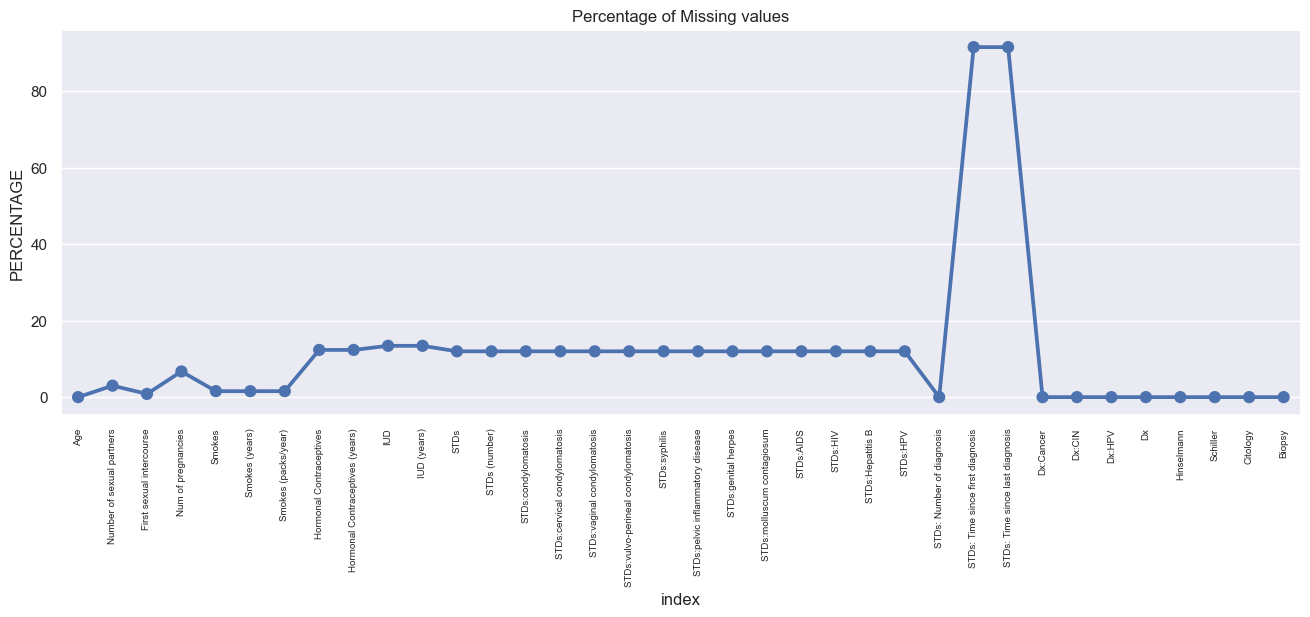

In [91]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [92]:
df.head(1)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


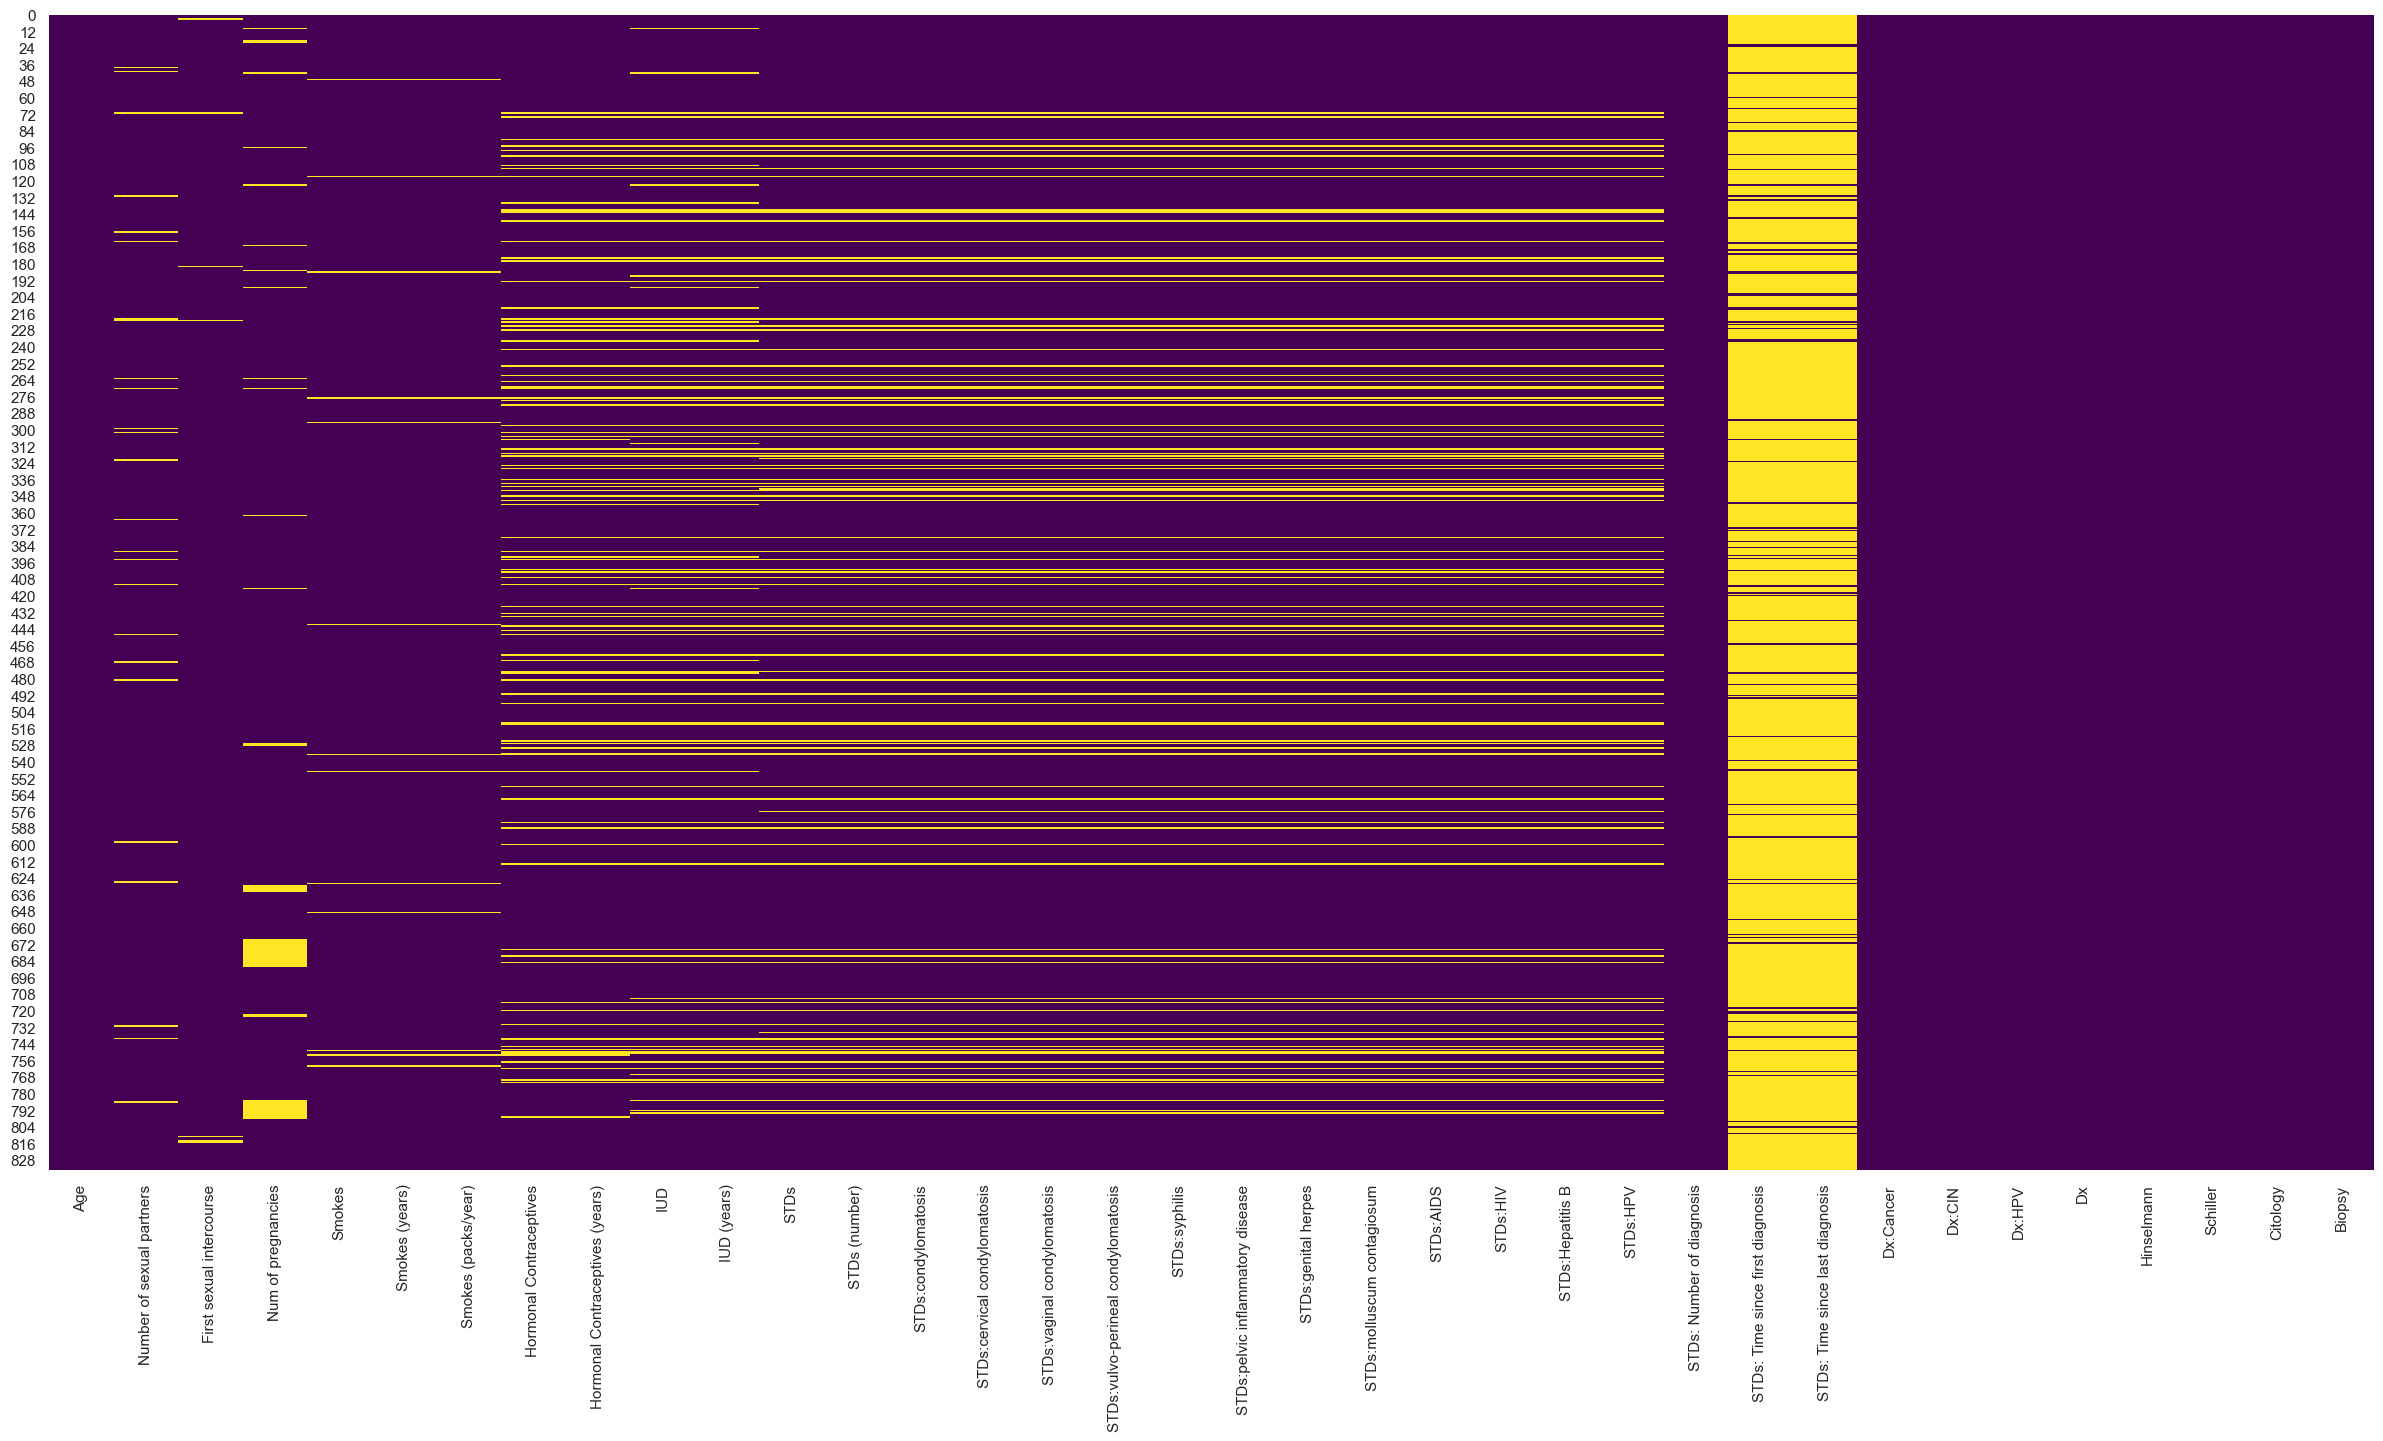

In [93]:
# Create heatmap with missing values in DataFrame highlighted
sns.heatmap(df.isnull(), cbar=False,cmap='viridis')
sns.set(rc={'figure.figsize':(10,5)})

In [94]:
### Feeling the null values

In [8]:
df['Number of sexual partners'].fillna(df['Number of sexual partners'].median(), inplace=True)

In [9]:
df['First sexual intercourse'].fillna(df['First sexual intercourse'].median(), inplace=True)

In [10]:
df['Num of pregnancies'].fillna(df['Num of pregnancies'].median(),inplace=True)

In [11]:
df['Hormonal Contraceptives'].fillna(df['Hormonal Contraceptives'].median(),inplace=True)

In [12]:
df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median(),inplace=True)

In [13]:
df['Smokes (years)'].fillna(df['Smokes (years)'].median(),inplace=True)

In [14]:
df['Smokes'].fillna(df['Smokes'].median(),inplace=True)

In [15]:
df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median(),inplace=True)

In [16]:
df['IUD'].fillna(df['IUD'].median(),inplace=True)
df['IUD (years)'].fillna(df['IUD (years)'].median(),inplace=True)
df['STDs'].fillna(df['STDs'].median(),inplace=True)
df['STDs (number)'].fillna(df['STDs (number)'].median(),inplace=True)
df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median(),inplace=True)
df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median(),inplace=True)
df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median(),inplace=True)
df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median(),inplace=True)
df['STDs:syphilis'].fillna(df['STDs:syphilis'].median(),inplace=True)
df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median(),inplace=True)
df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median(),inplace=True)
df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median(),inplace=True)
df['STDs:AIDS'].fillna(df['STDs:AIDS'].median(),inplace=True)
df['STDs:HIV'].fillna(df['STDs:HIV'].median(),inplace=True)
df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median(),inplace=True)
df['STDs:HPV'].fillna(df['STDs:HPV'].median(),inplace=True)

In [17]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1, inplace=True)

In [18]:
df.isna().sum().sum()

0

CORRELATION:
A correlation heatmap is a graphical representation that showcases the correlation between variables in a dataset. It uses colors to indicate the strength and direction of the relationships between pairs of variables. The heatmap is constructed by calculating the correlation coefficient between each variable pair and assigning a color gradient to represent the magnitude of correlation. Darker shades indicate stronger positive correlations, while lighter shades represent weaker or negative correlations. This visualization technique allows for a quick and intuitive understanding of the interdependencies and patterns within the dataset, aiding in identifying important relationships and potential insights.

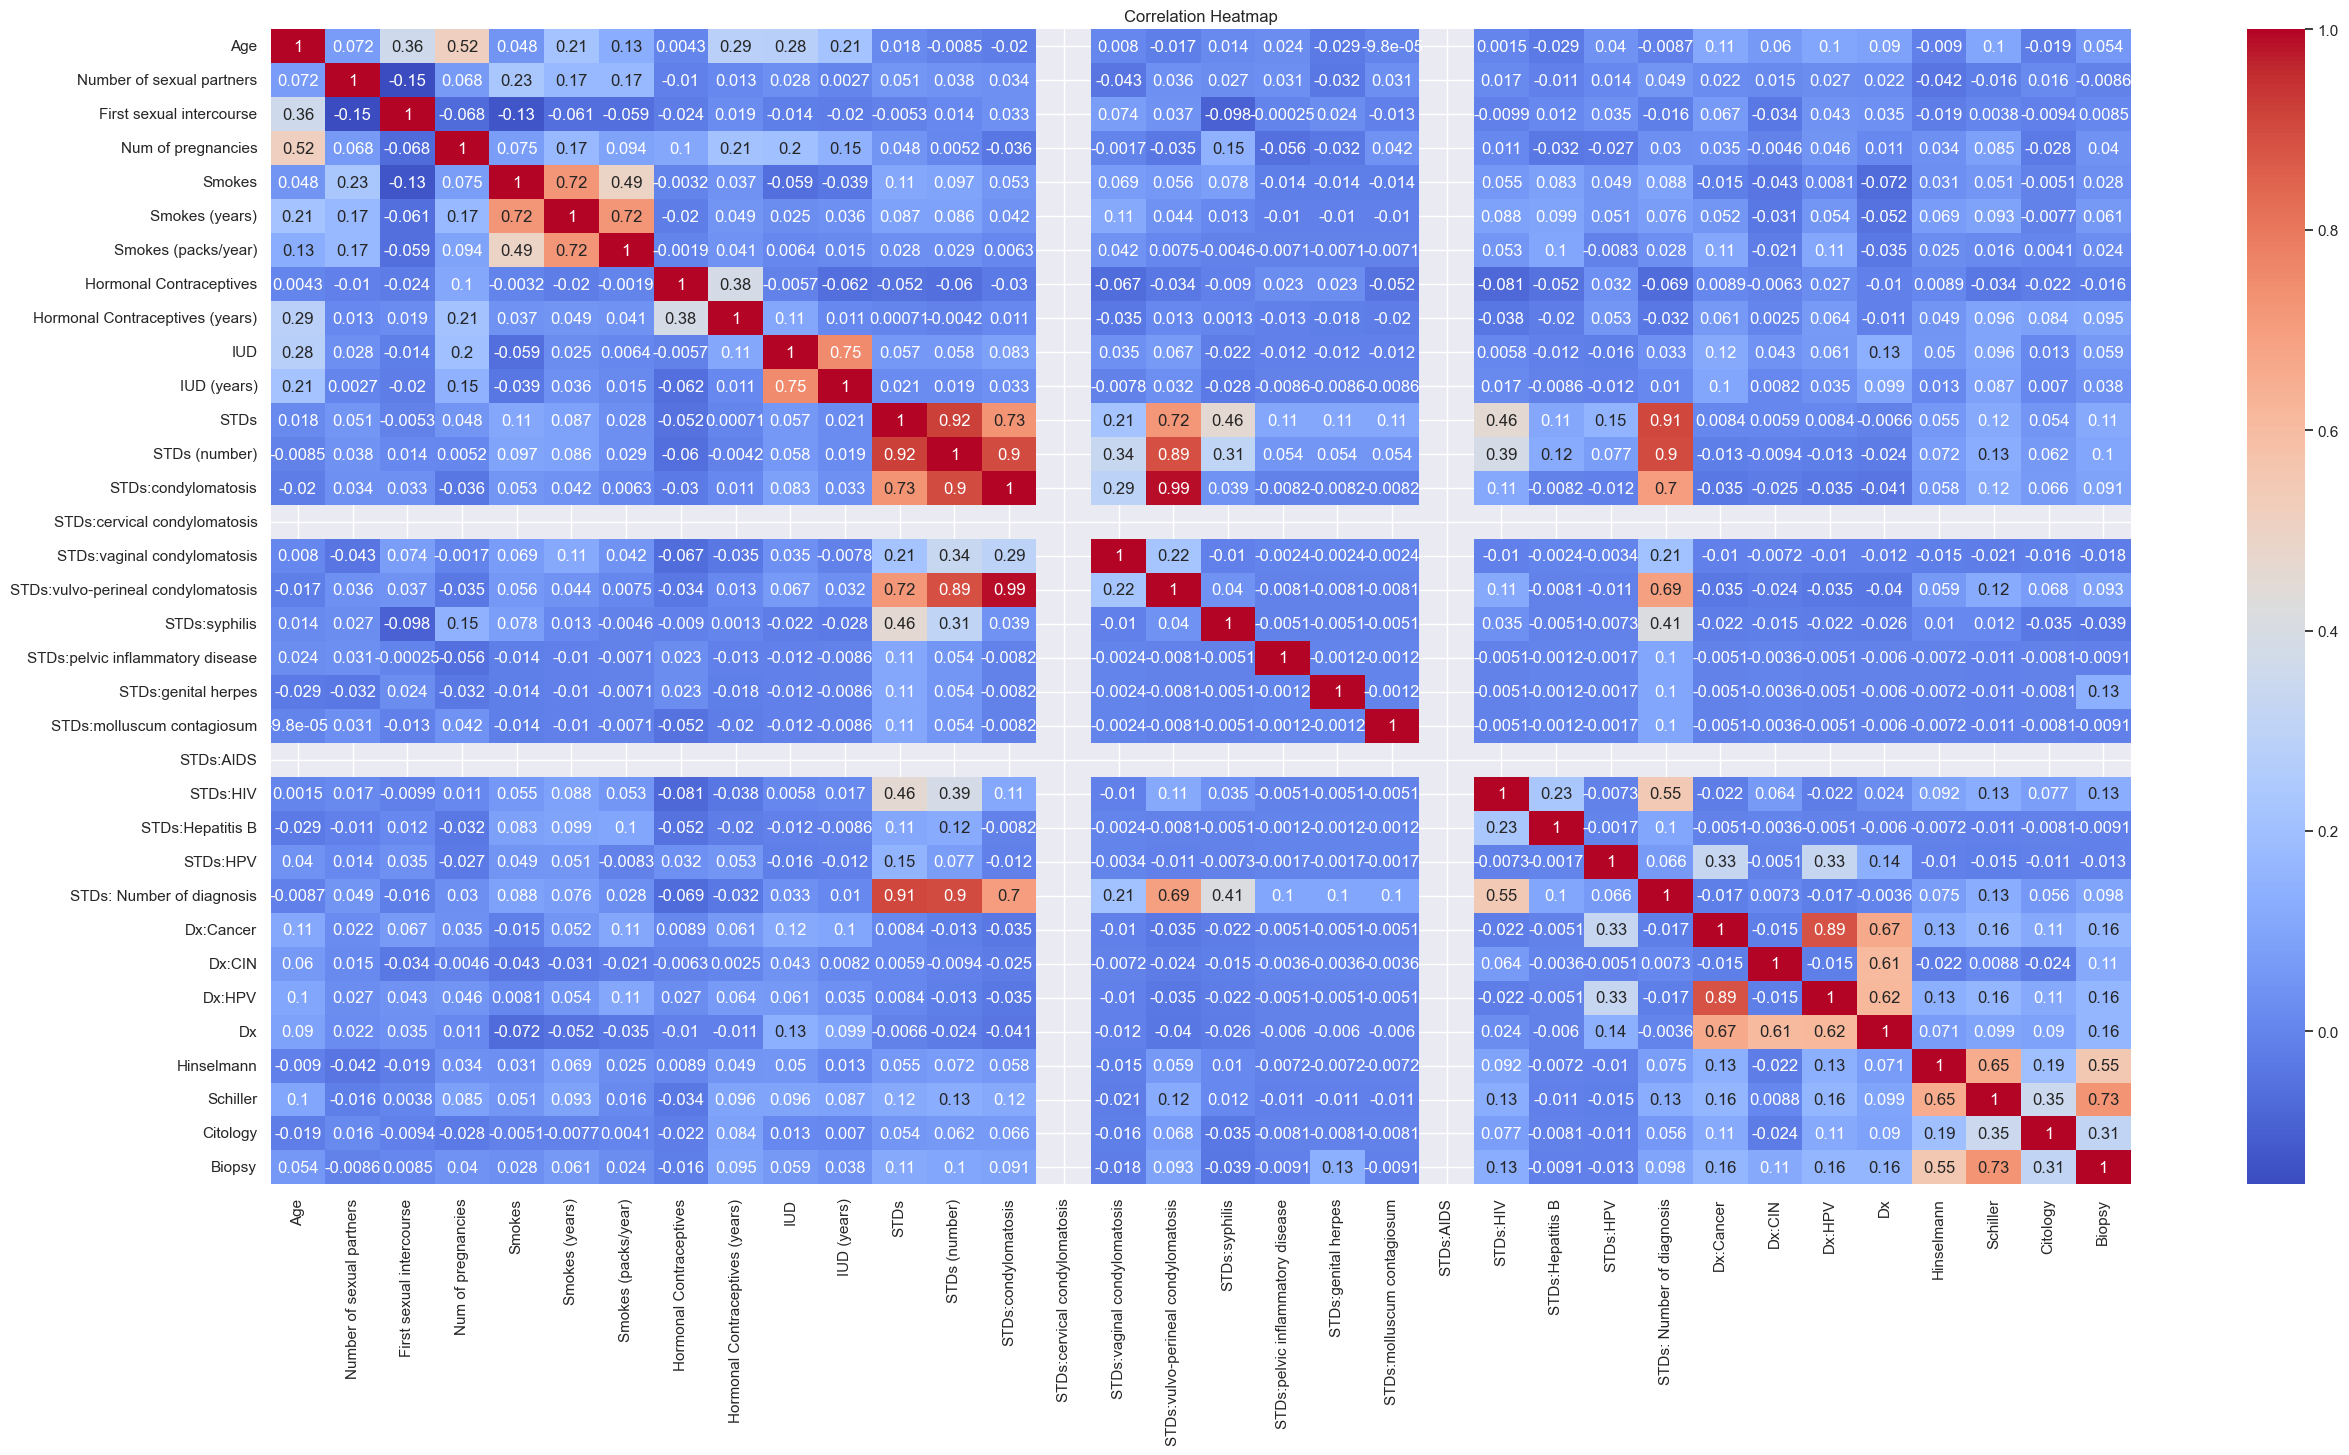

In [106]:
# Assuming 'df' is your DataFrame
# Remove non-numeric columns if present
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set the style and figure size
sns.set(rc={'figure.figsize':(30, 15)})

# Create the heatmap with annotations and color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()
# By using select_dtypes, this code snippet filters out only the numeric columns from your DataFrame, allowing you to calculate the correlation matrix without encountering the 'string to float' conversion error.

In [23]:
df.value_counts('Biopsy').to_dict()

{0: 781, 1: 54}

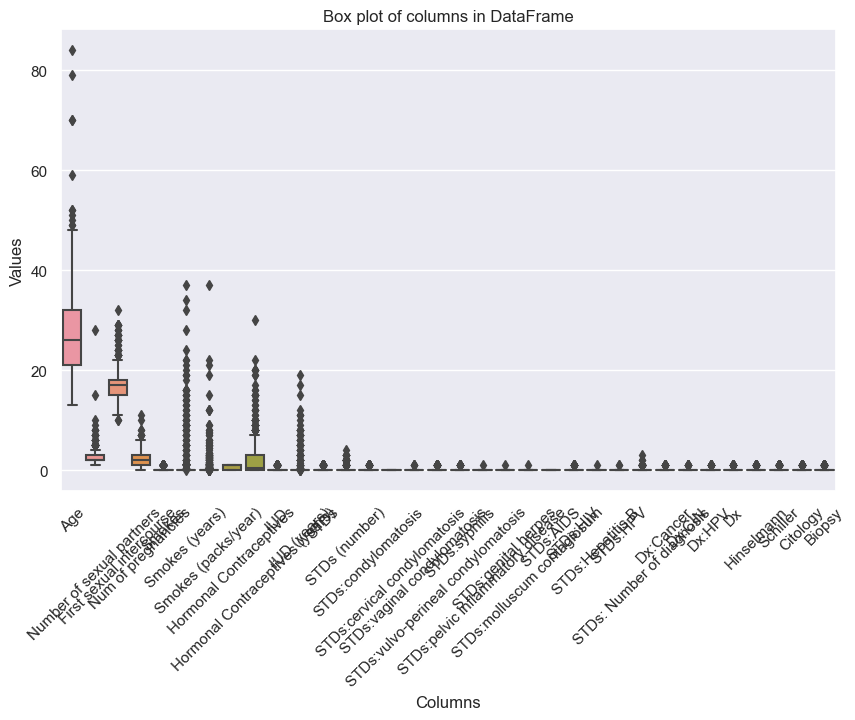

In [108]:
# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plot of columns in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

### **Splitting the Data into Training and Testing part**

In [19]:
x = df.drop('Biopsy', axis=1)
y = df['Biopsy']

### Balance the data

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x, y = sm.fit_resample(x, y)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1093, 33), (469, 33), (1093,), (469,))

### here we selected importance columns only

In [27]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.04199057, 0.30403253, 0.33148393, 0.31274092, 0.03947532,
       0.03295131, 0.03920011, 0.13765152, 0.31975602, 0.06434198,
       0.05232026, 0.09562867, 0.11544846, 0.05479228, 0.        ,
       0.00818699, 0.04444211, 0.0400918 , 0.00765971, 0.00071935,
       0.00135806, 0.02391916, 0.06138182, 0.01278773, 0.        ,
       0.01636023, 0.02508862, 0.02334422, 0.01777745, 0.        ,
       0.0899197 , 0.34558558, 0.0042287 ])

In [113]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

First sexual intercourse              0.362559
Hormonal Contraceptives (years)       0.353717
Schiller                              0.313738
Number of sexual partners             0.304534
Num of pregnancies                    0.299115
STDs (number)                         0.147844
Hormonal Contraceptives               0.140606
STDs                                  0.081473
IUD                                   0.078606
Smokes                                0.061657
STDs:vulvo-perineal condylomatosis    0.053336
STDs:condylomatosis                   0.050617
Age                                   0.038830
Hinselmann                            0.037221
IUD (years)                           0.036243
STDs:HIV                              0.035034
STDs:Hepatitis B                      0.032626
Dx:Cancer                             0.027948
Smokes (packs/year)                   0.024195
Smokes (years)                        0.018228
STDs:genital herpes                   0.012296
STDs: Number 

<Axes: >

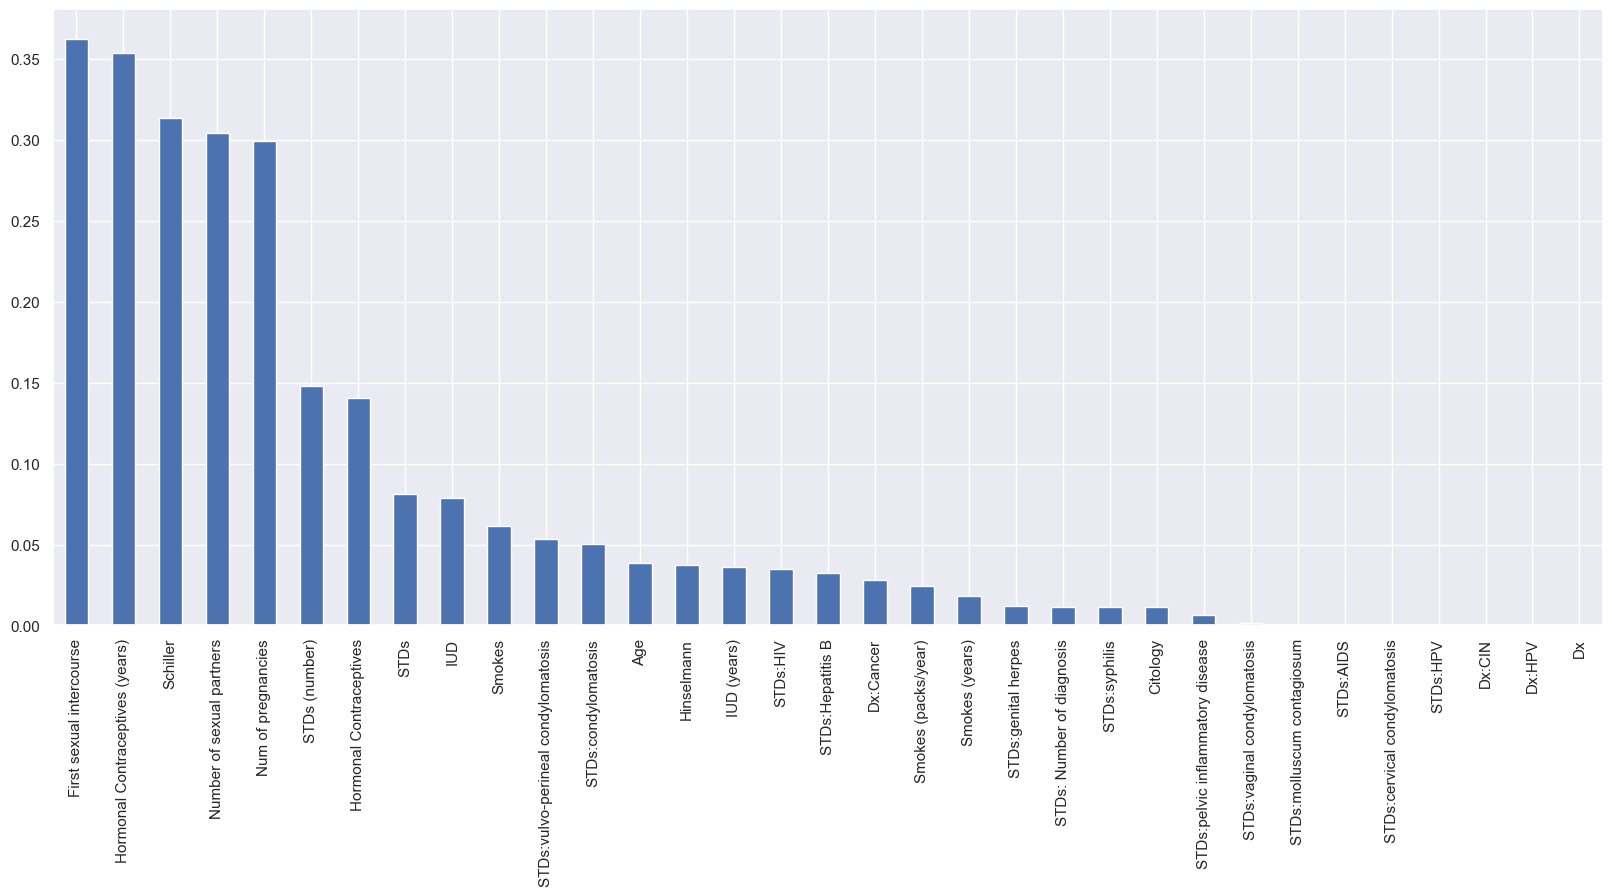

In [114]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [115]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 15 important features
sel_15_cols = SelectKBest(mutual_info_classif, k=15)
sel_15_cols.fit(x_train, y_train)
x_train.columns[sel_15_cols.get_support()]

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:vulvo-perineal condylomatosis', 'STDs:HIV',
       'Hinselmann', 'Schiller'],
      dtype='object')

In [22]:
x_train = x_train[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'Hinselmann', 'Schiller']]

In [23]:
x_test = x_test[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'Hinselmann', 'Schiller']]

In [24]:
x_train.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,Hinselmann,Schiller
521,18,1.000000,16.000000,1.000000,1.0,2.000000,0.000000,0.000000,0.0,1.000000,2.000000,1.0,1.0,1,1
35,37,3.000000,17.000000,5.000000,0.0,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.0,0.0,0,0
664,49,2.000000,15.000000,6.000000,0.0,0.000000,1.000000,2.000000,0.0,1.000000,1.000000,0.0,0.0,0,0
972,24,2.494137,17.505863,3.011727,0.0,0.000000,0.494137,0.039531,0.0,0.505863,0.505863,0.0,0.0,1,1
1126,28,5.000000,14.809693,4.000000,0.0,0.000000,0.190307,0.570921,0.0,0.000000,0.000000,0.0,0.0,0,0
559,19,1.000000,18.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,1,1
323,21,1.000000,18.000000,1.000000,0.0,0.000000,1.000000,0.250000,0.0,0.000000,0.000000,0.0,0.0,0,0
705,31,2.000000,19.000000,2.000000,0.0,0.000000,1.000000,9.000000,0.0,0.000000,0.000000,0.0,0.0,0,0
6,51,3.000000,17.000000,6.000000,1.0,34.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.0,1,1
913,35,3.000000,17.646064,3.451312,1.0,12.902624,1.000000,7.584256,0.0,0.451312,0.451312,0.0,0.0,0,1


In [25]:
y_train.head()

521     1
35      0
664     0
972     1
1126    1
Name: Biopsy, dtype: int64

## **Model Building**

##### **AdaBoost**

In [119]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [120]:
y_pred = adb.predict(x_train)
acc_adb = accuracy_score(y_train, y_pred) * 100
pre_adb = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_adb = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_adb = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_adb}%")
print(f"Precision : {pre_adb}%")
print(f"Recall : {recall_adb}%")
print(f"F1 Score : {f1_adb}%")

Accuracy: 96.34034766697164%
Precision : 96.35196870436612%
Recall : 96.33831112301614%
F1 Score : 96.33997696161161%


<Axes: >

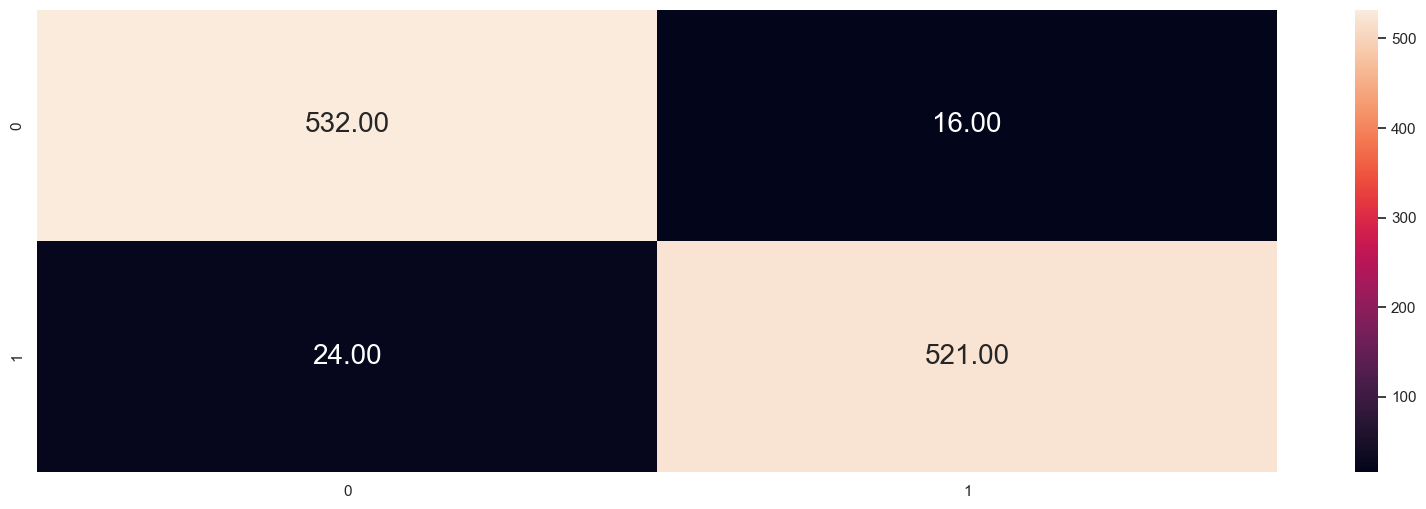

In [121]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

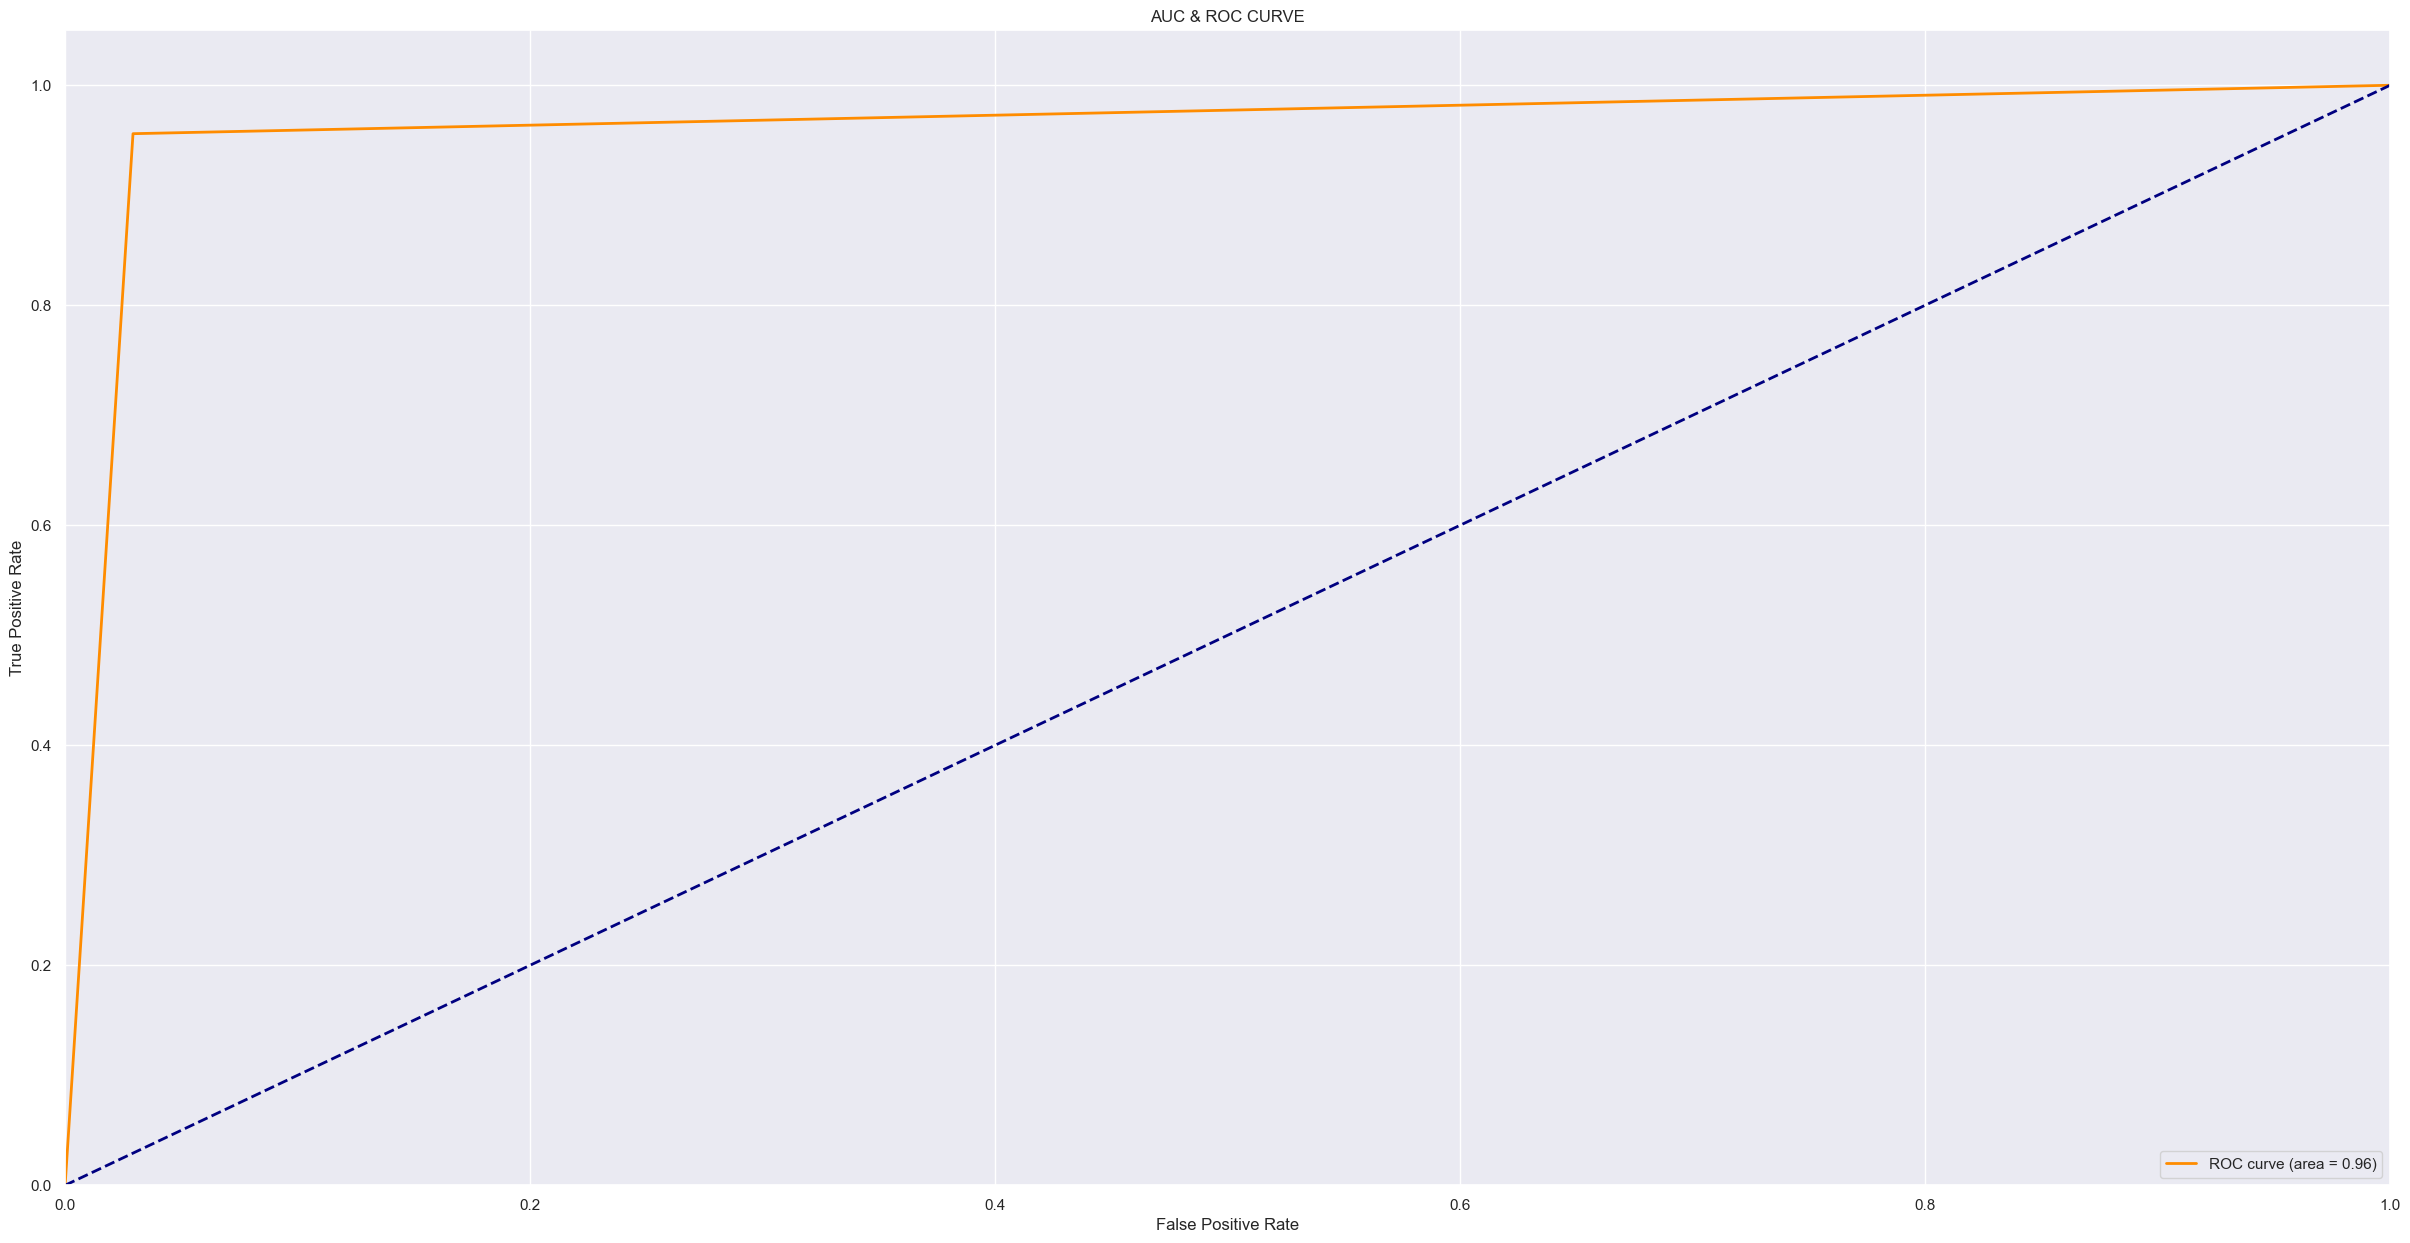

In [122]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [123]:
y_pred = adb.predict(x_test)
acc_adb = accuracy_score(y_test, y_pred) * 100
pre_adb = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_adb = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_adb = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_adb}%")
print(f"Precision : {pre_adb}%")
print(f"Recall : {recall_adb}%")
print(f"F1 Score : {f1_adb}%")

Accuracy: 95.0959488272921%
Precision : 95.18306010928961%
Recall : 95.11075143667709%
F1 Score : 95.09452152598718%


<Axes: >

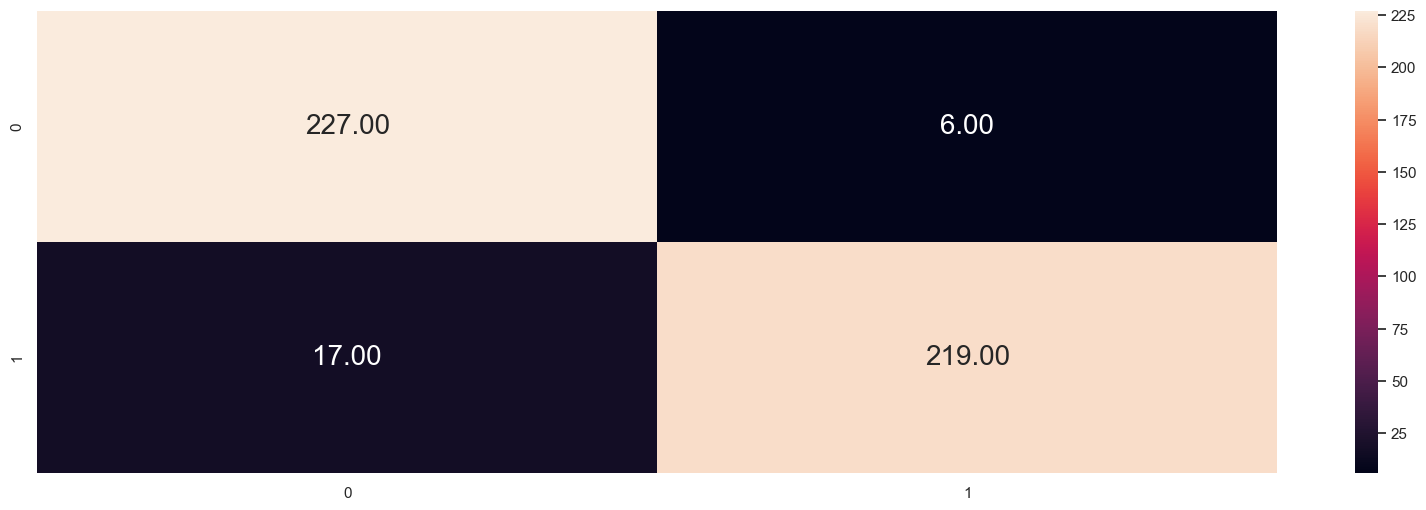

In [124]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

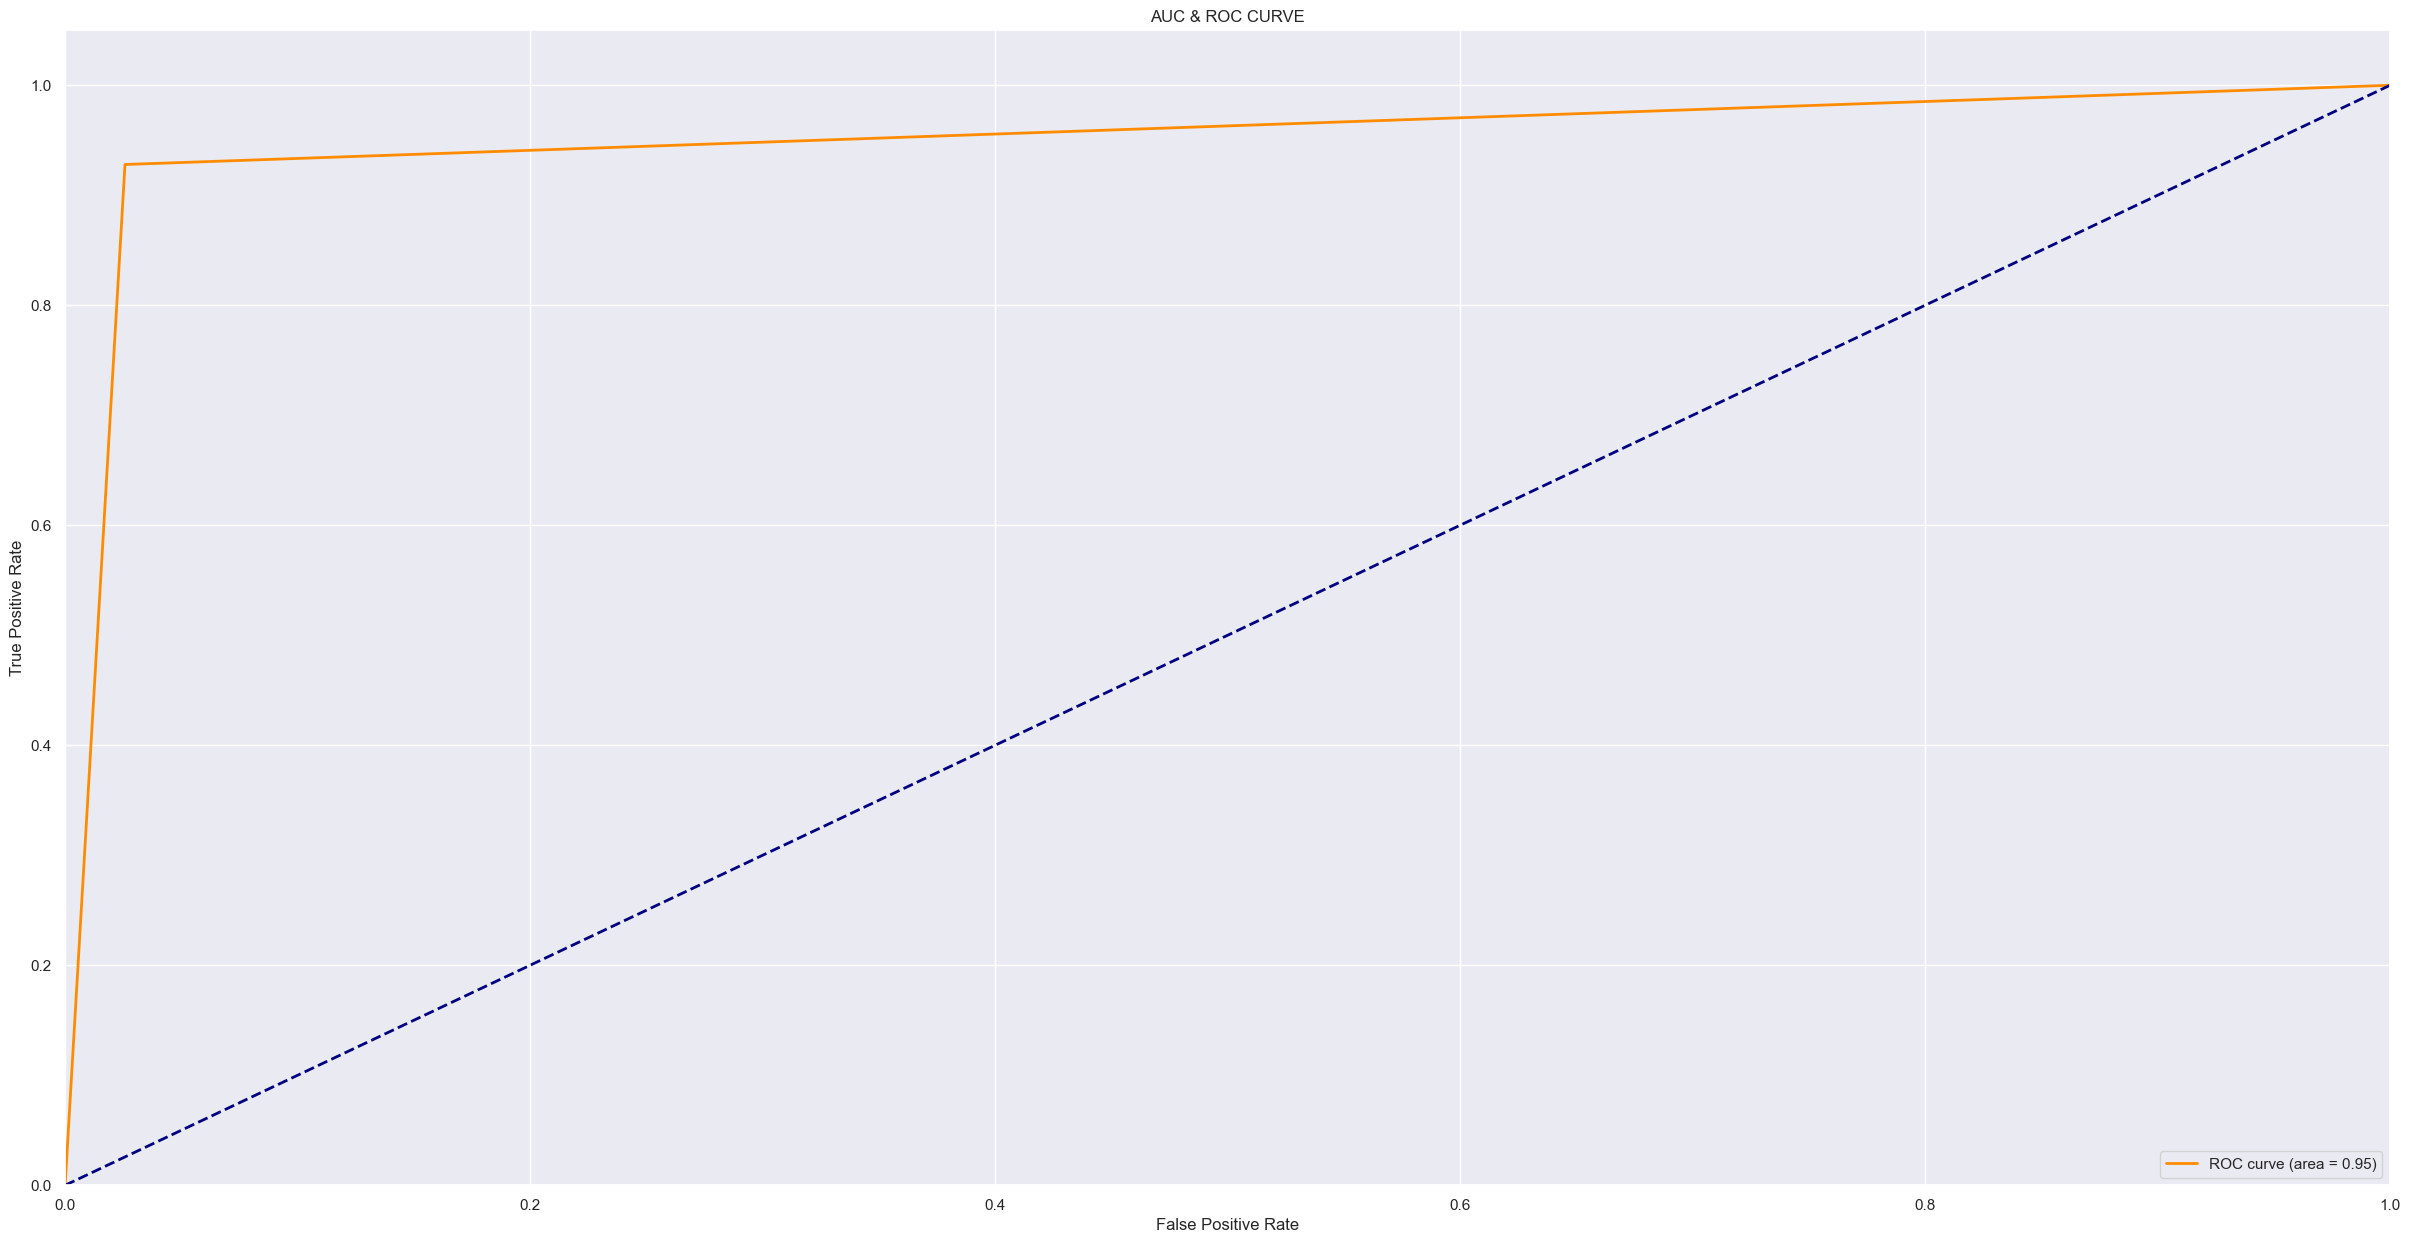

In [125]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##### **Logistic Regression**

In [126]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

c:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
y_pred = lr.predict(x_train)
acc_lr = accuracy_score(y_train, y_pred) * 100
pre_lr = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_lr = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_lr = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_lr}%")
print(f"Precision : {pre_lr}%")
print(f"Recall : {recall_lr}%")
print(f"F1 Score : {f1_lr}%")

Accuracy: 85.45288197621225%
Precision : 87.23279205467689%
Recall : 85.42288890377017%
F1 Score : 85.26935449008913%


<Axes: >

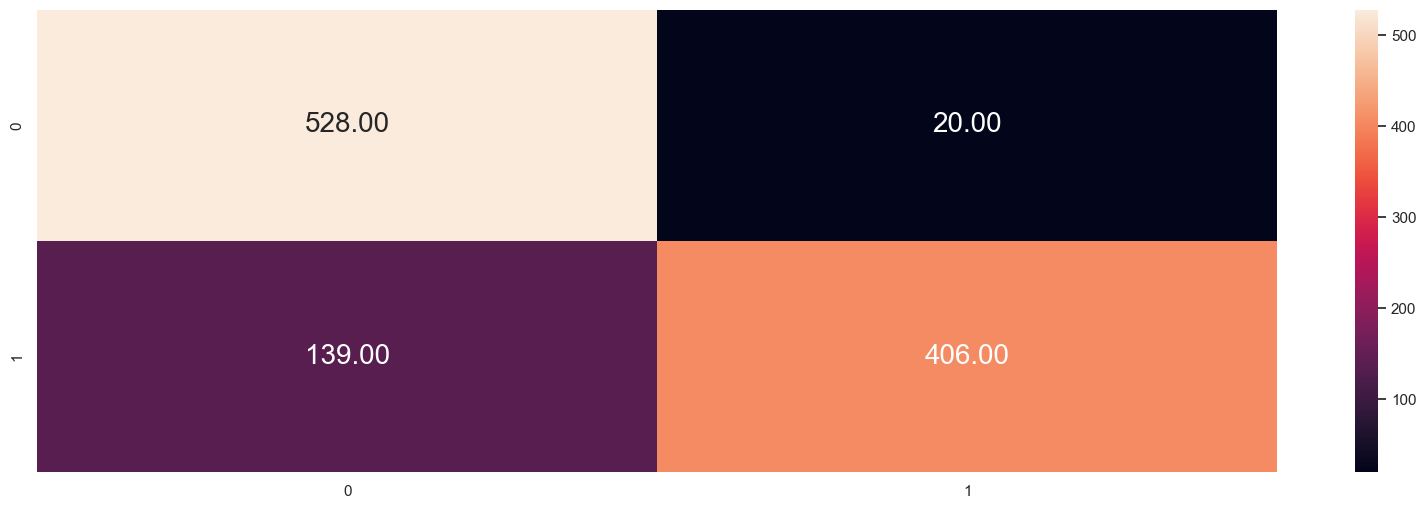

In [128]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

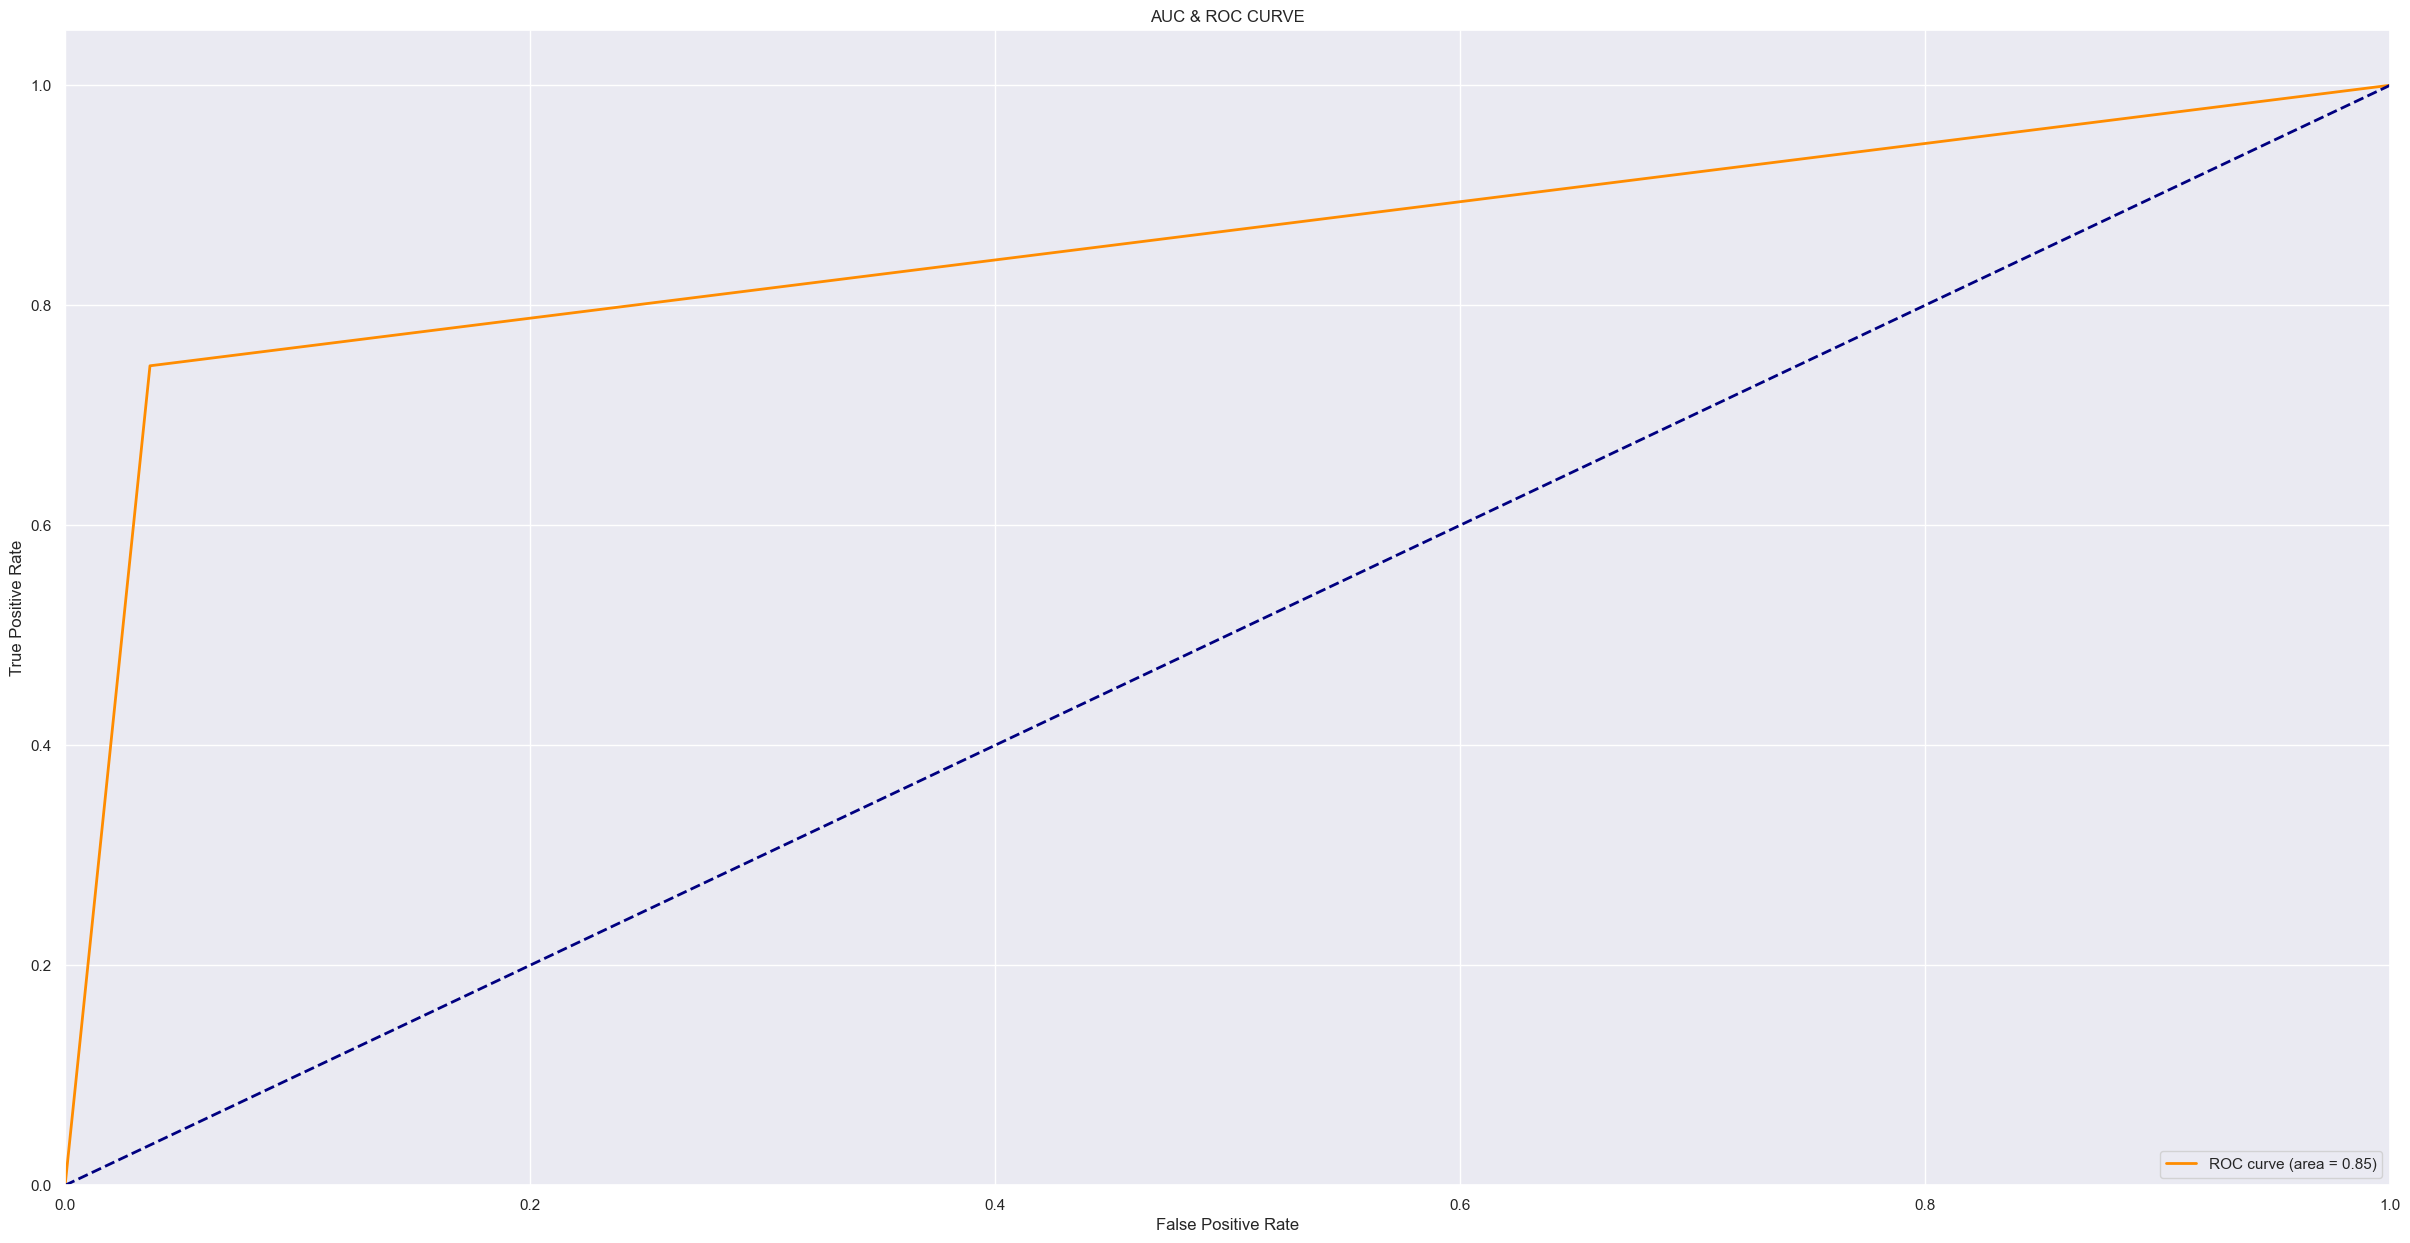

In [129]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [130]:
y_pred = lr.predict(x_test)
acc_lr = accuracy_score(y_test, y_pred) * 100
pre_lr = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_lr = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_lr = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_lr}%")
print(f"Precision : {pre_lr}%")
print(f"Recall : {recall_lr}%")
print(f"F1 Score : {f1_lr}%")

Accuracy: 86.56716417910447%
Precision : 88.06216931216932%
Recall : 86.63071942969374%
F1 Score : 86.44788441692467%


<Axes: >

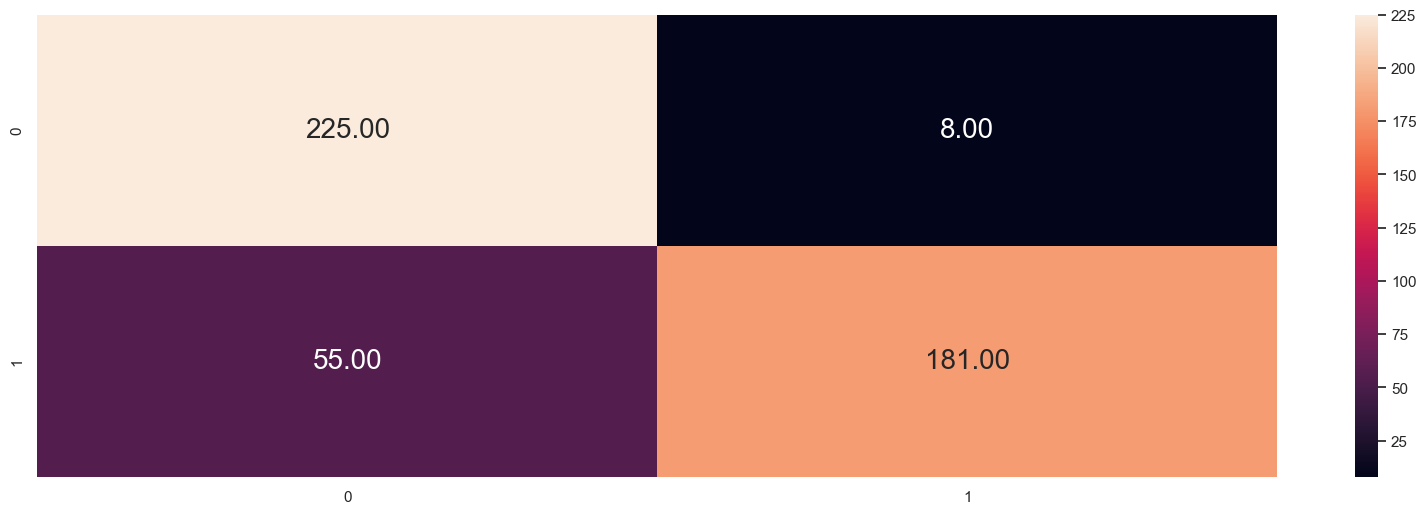

In [131]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

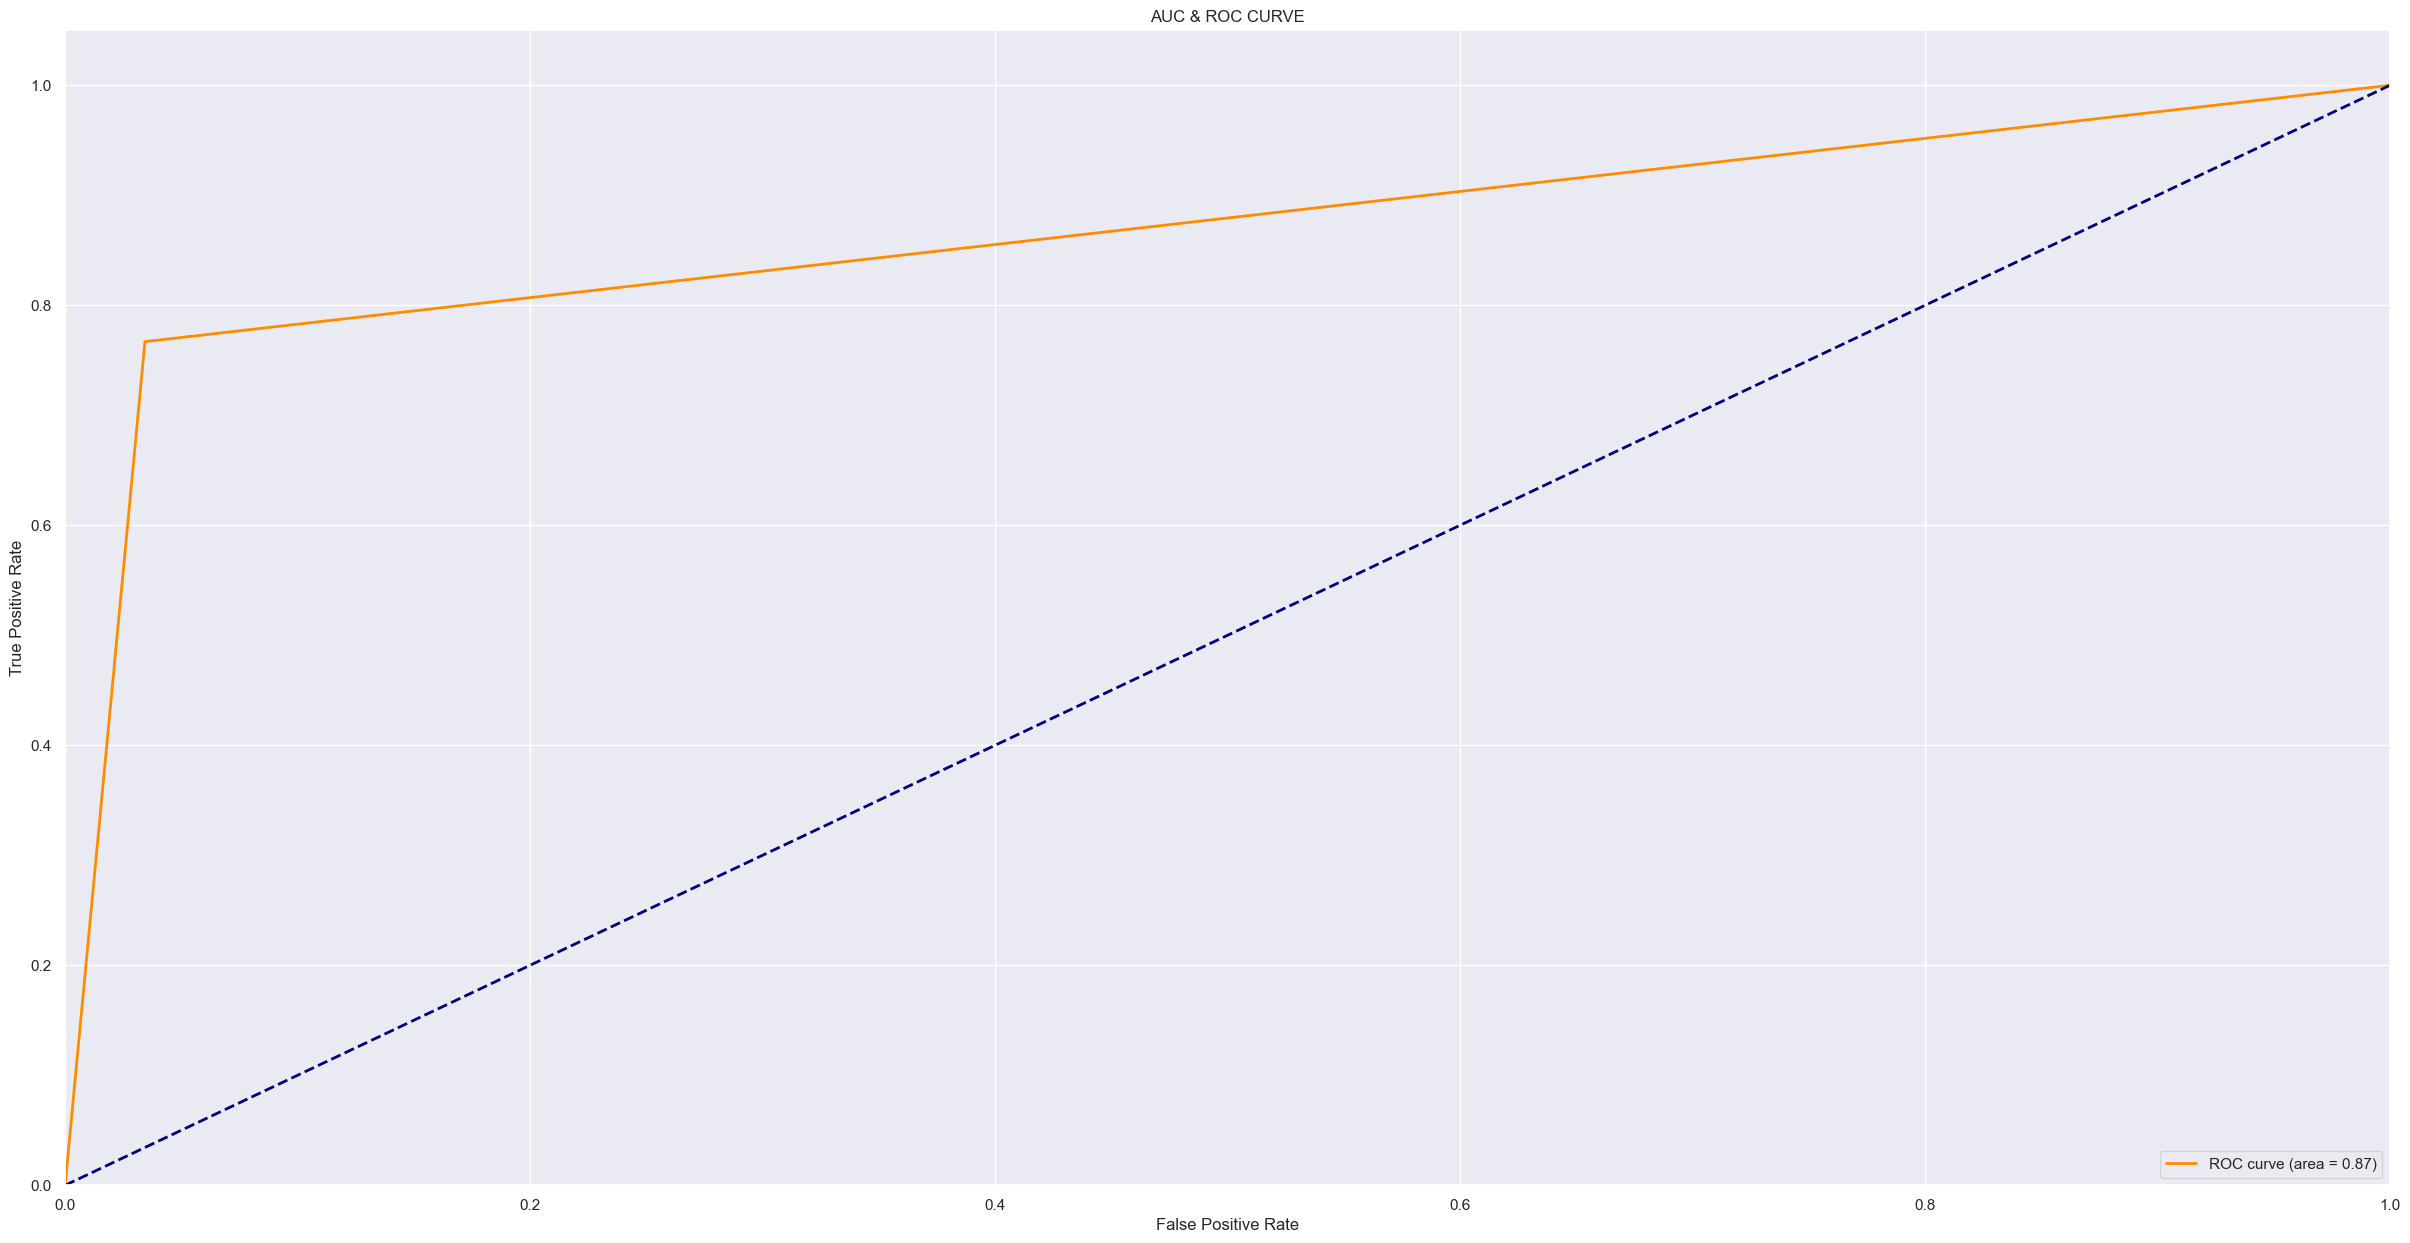

In [132]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##### **Stacking Classifier**

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

# Base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('adb', AdaBoostClassifier(random_state=42))
]

# Meta classifier
meta_classifier = LogisticRegression(random_state=42)

# Stacking classifier
STC = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train stacking classifier
STC.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('adb', AdaBoostClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [134]:
y_pred = STC.predict(x_train)
acc_stc = accuracy_score(y_train, y_pred) * 100
pre_stc = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_stc = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_stc = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_stc}%")
print(f"Precision : {pre_stc}%")
print(f"Recall : {recall_stc}%")
print(f"F1 Score : {f1_stc}%")

Accuracy: 100.0%
Precision : 100.0%
Recall : 100.0%
F1 Score : 100.0%


<Axes: >

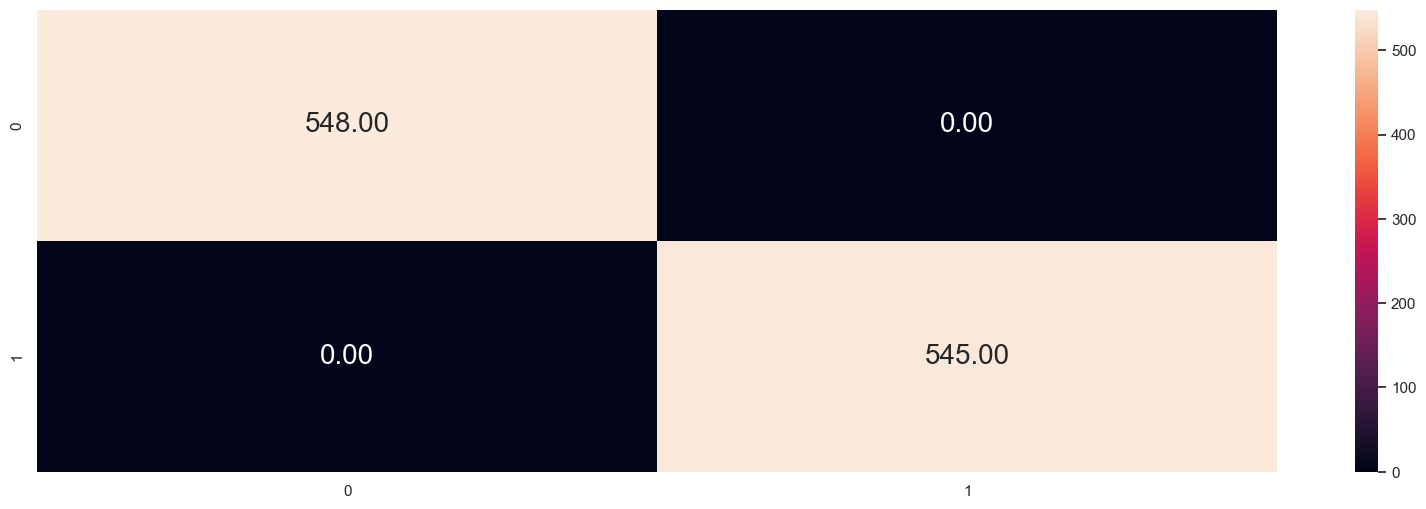

In [135]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

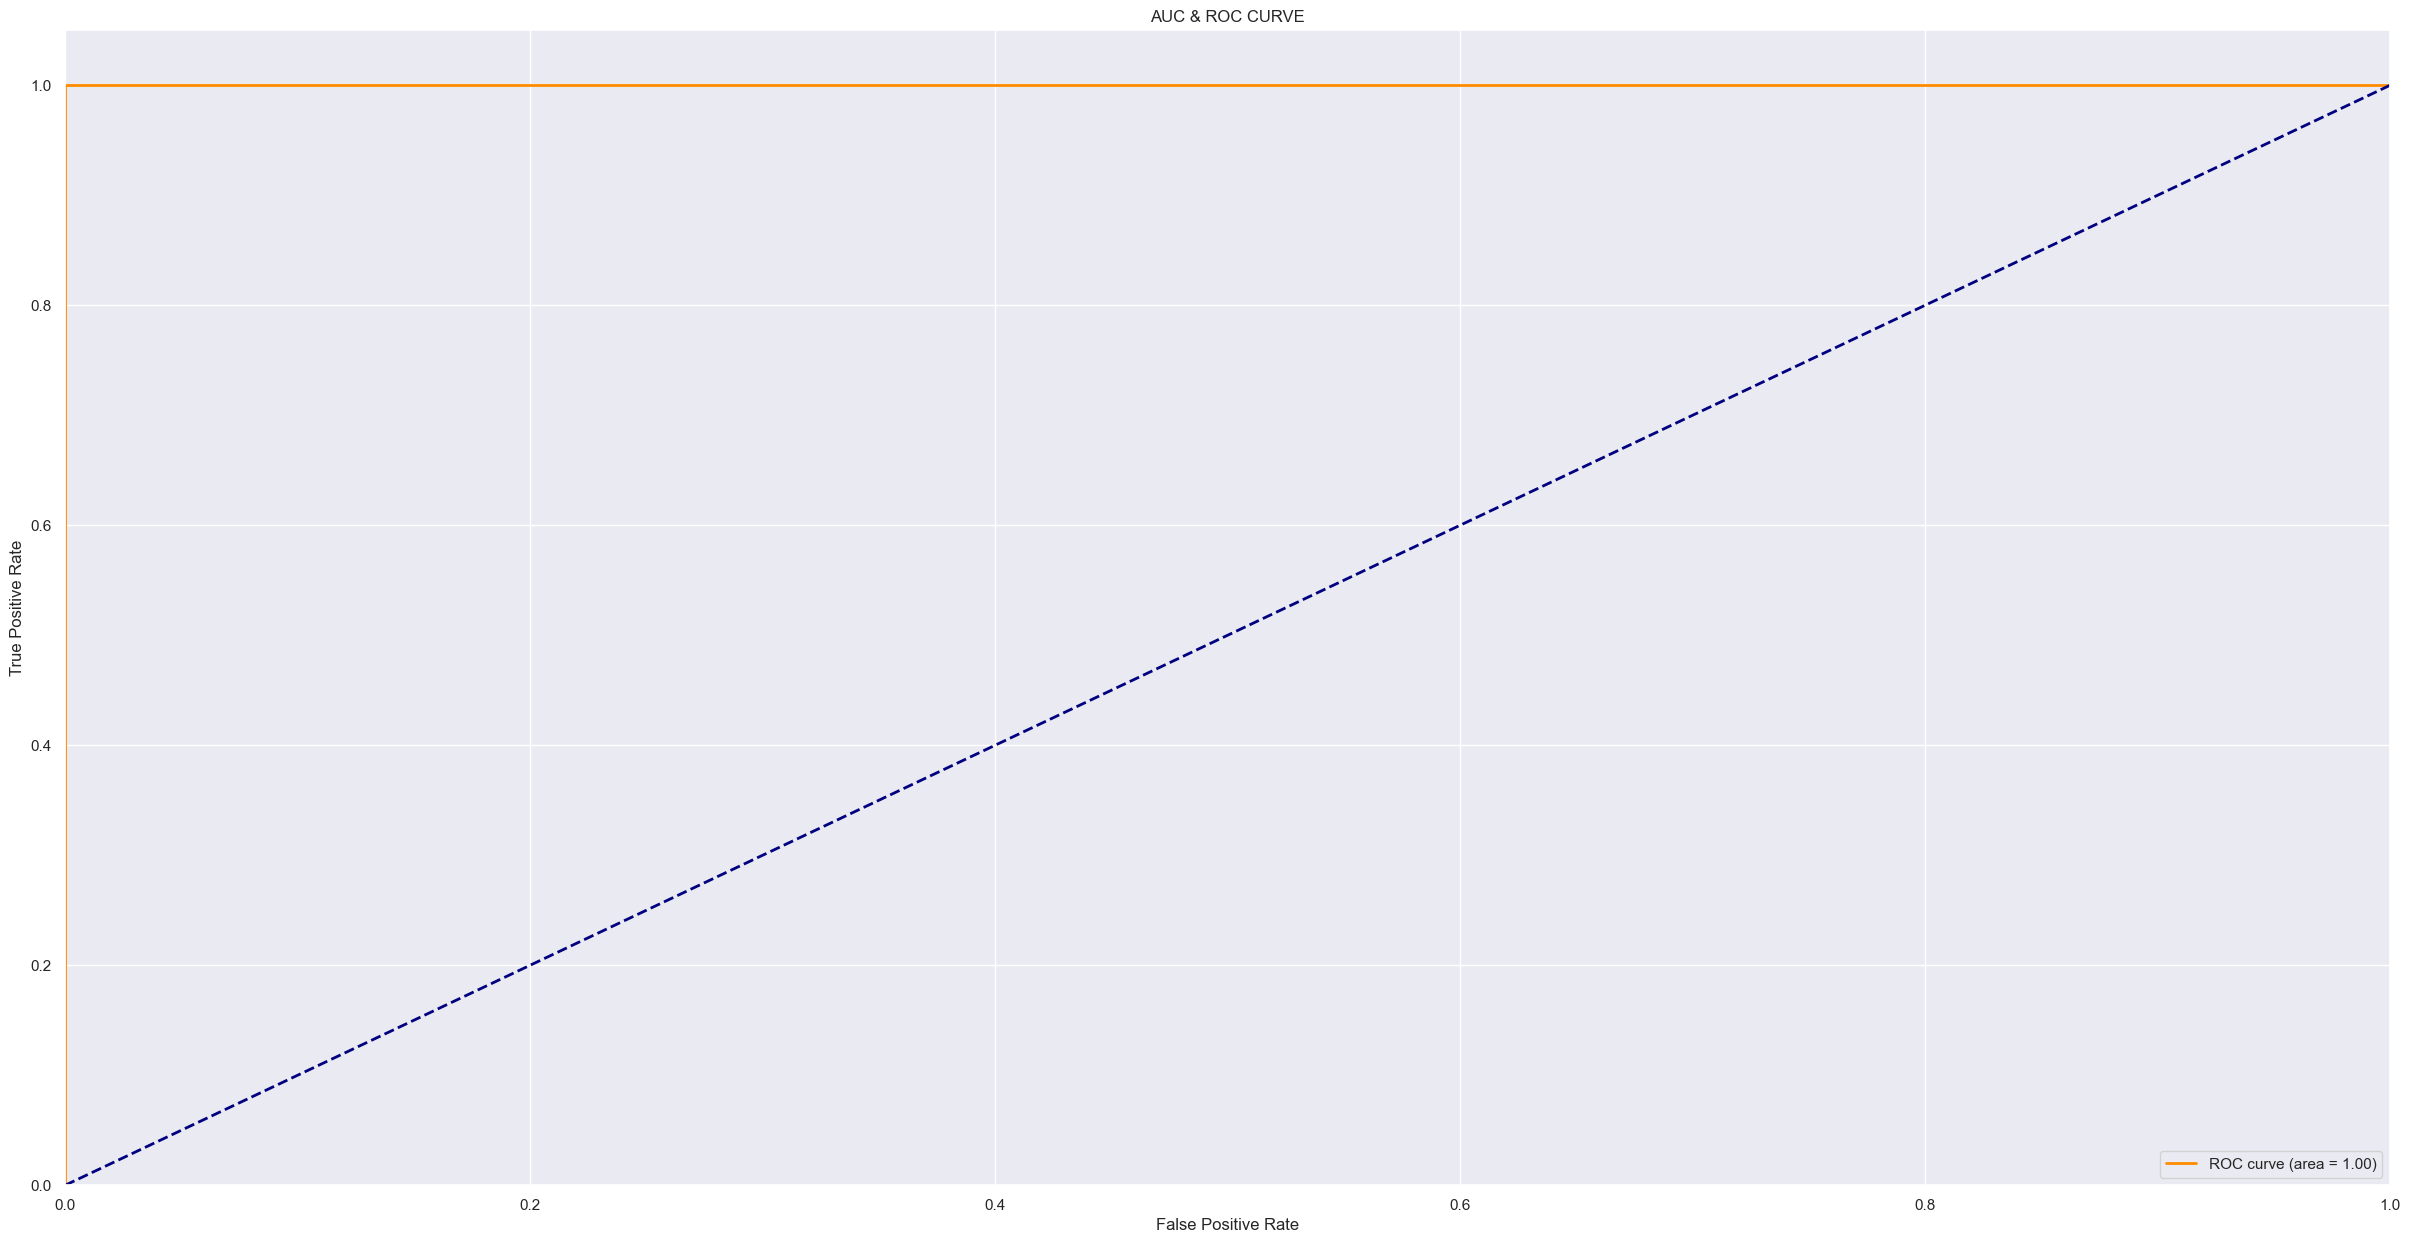

In [136]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [137]:
y_pred = STC.predict(x_test)
acc_stc = accuracy_score(y_test, y_pred) * 100
pre_stc = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_stc = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_stc = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_stc}%")
print(f"Precision : {pre_stc}%")
print(f"Recall : {recall_stc}%")
print(f"F1 Score : {f1_stc}%")

Accuracy: 97.44136460554371%
Precision : 97.44716068245481%
Recall : 97.43853204335491%
F1 Score : 97.441073766914%


<Axes: >

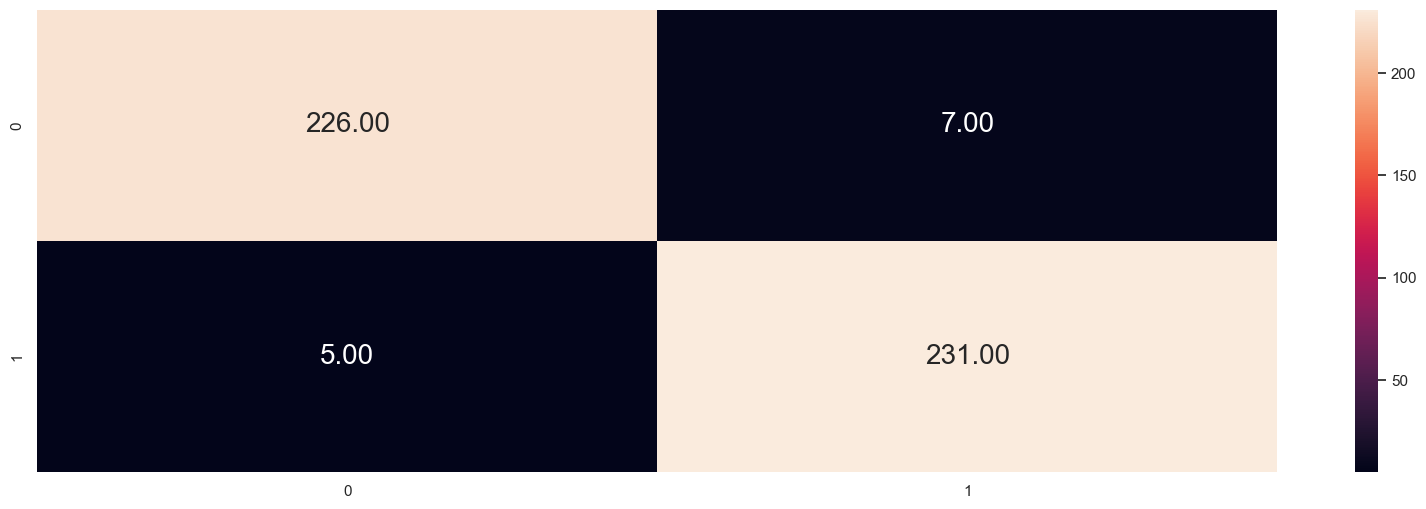

In [138]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

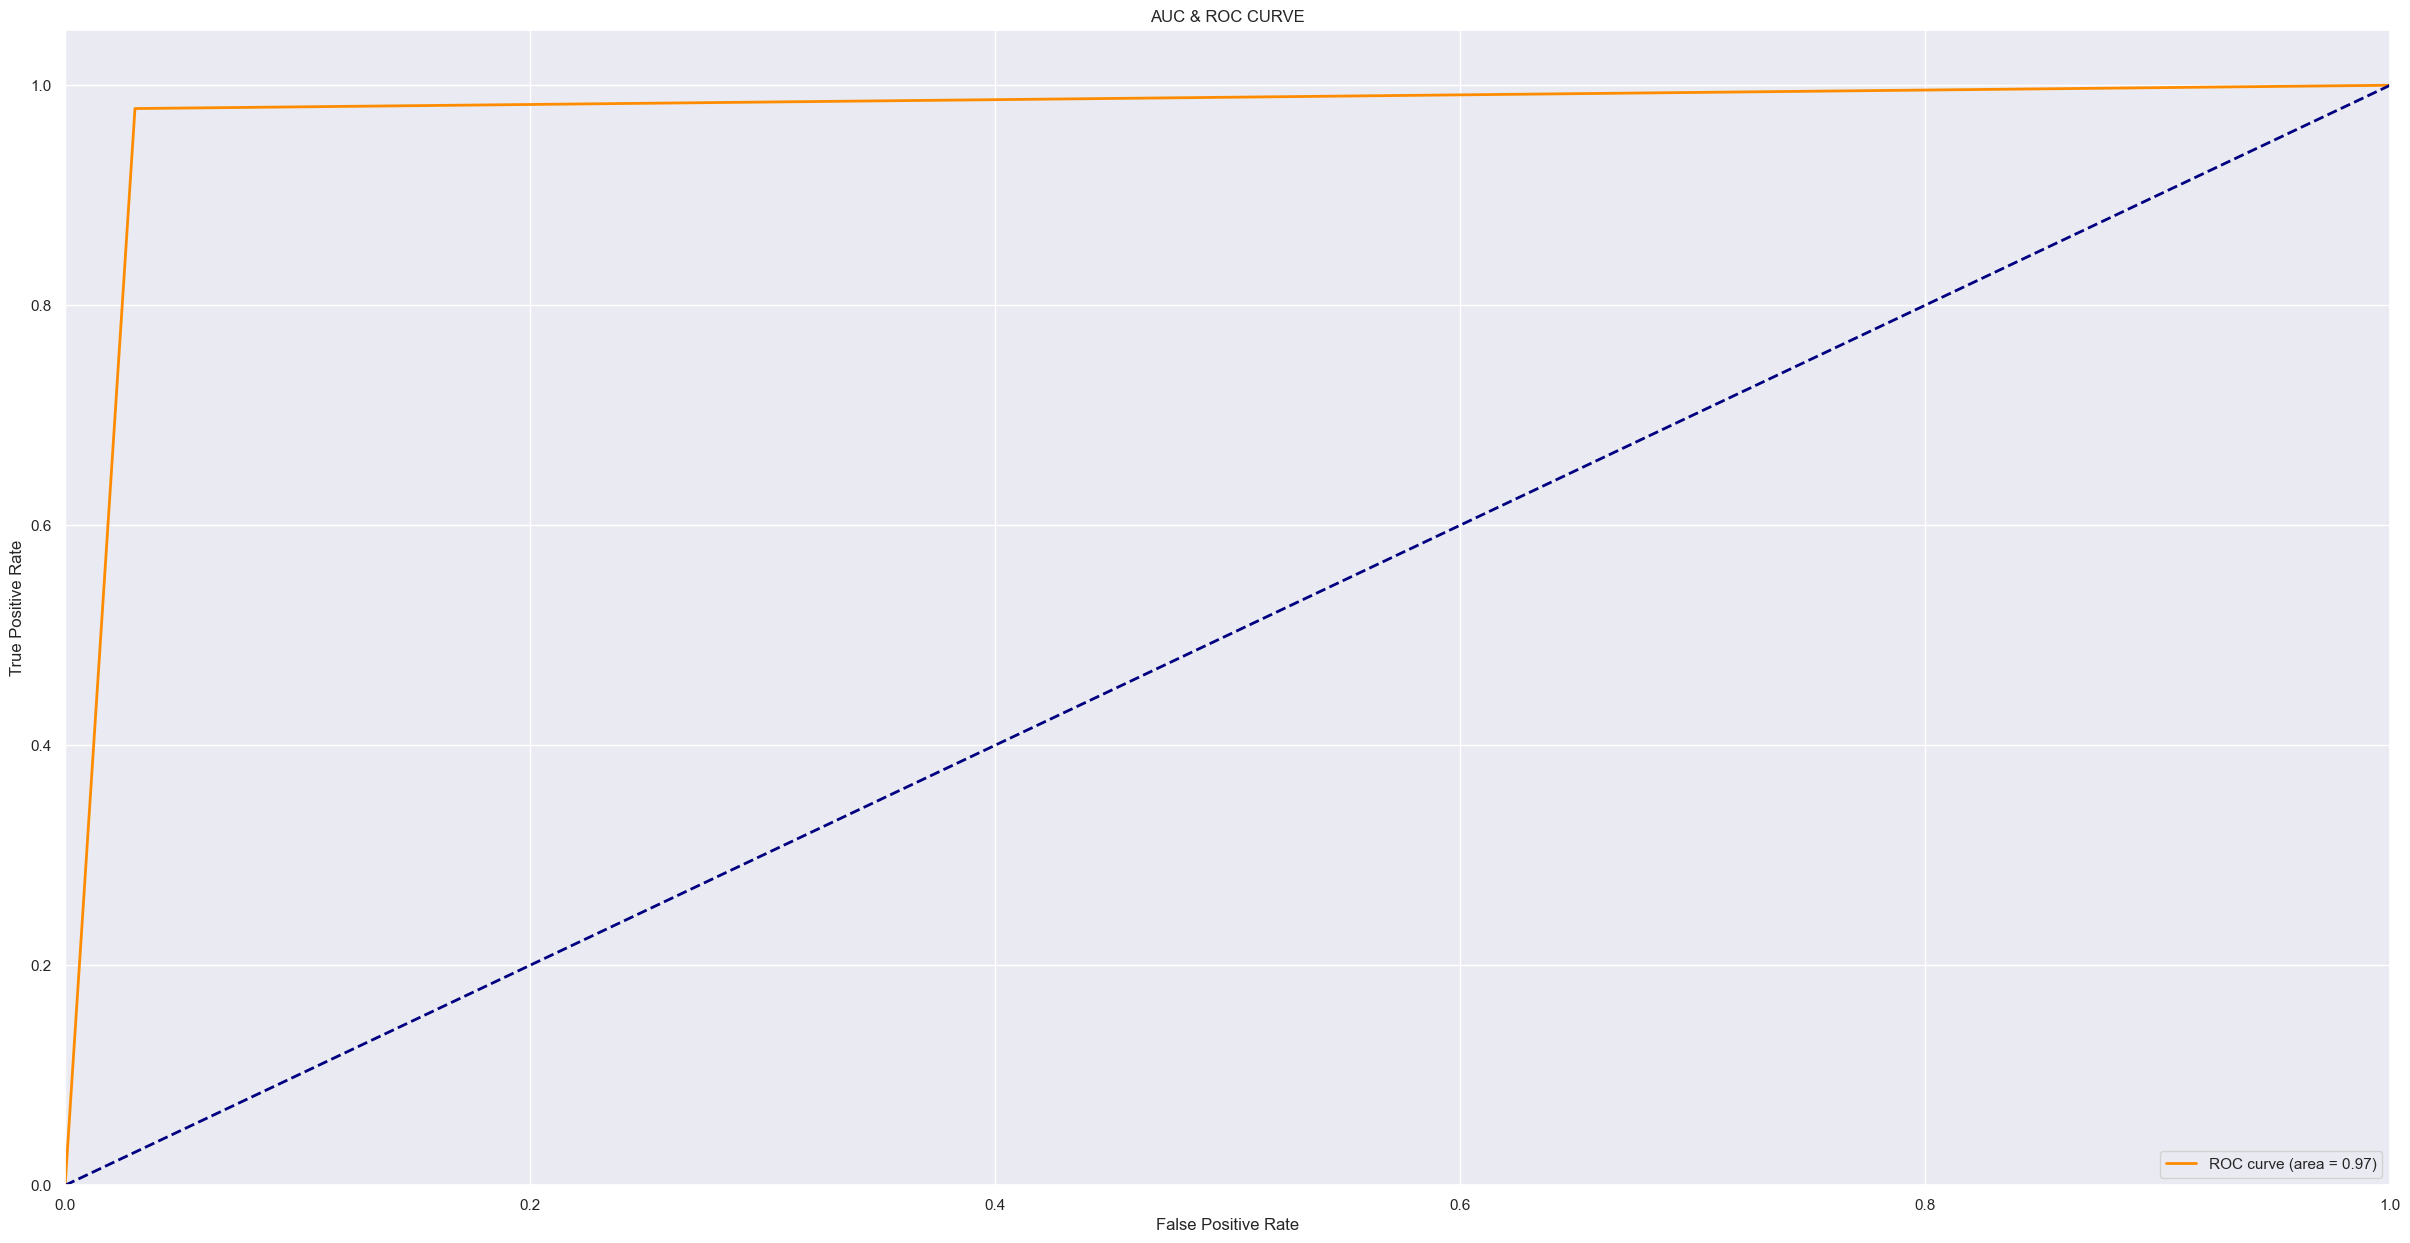

In [139]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##### **XGBoost**

In [140]:
import xgboost as xgb

boost = xgb.XGBClassifier(random_state=42)
# Training the model
boost.fit(x_train, y_train)

XGBClassifier(random_state=42)

In [141]:
y_pred = boost.predict(x_train)
acc_xgb = accuracy_score(y_train, y_pred) * 100
pre_xgb = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_xgb = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_xgb = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_xgb}%")
print(f"Precision : {pre_xgb}%")
print(f"Recall : {recall_xgb}%")
print(f"F1 Score : {f1_xgb}%")

Accuracy: 98.81061299176578%
Precision : 98.81052828950452%
Recall : 98.8108551530168%
F1 Score : 98.81060900937099%


<Axes: >

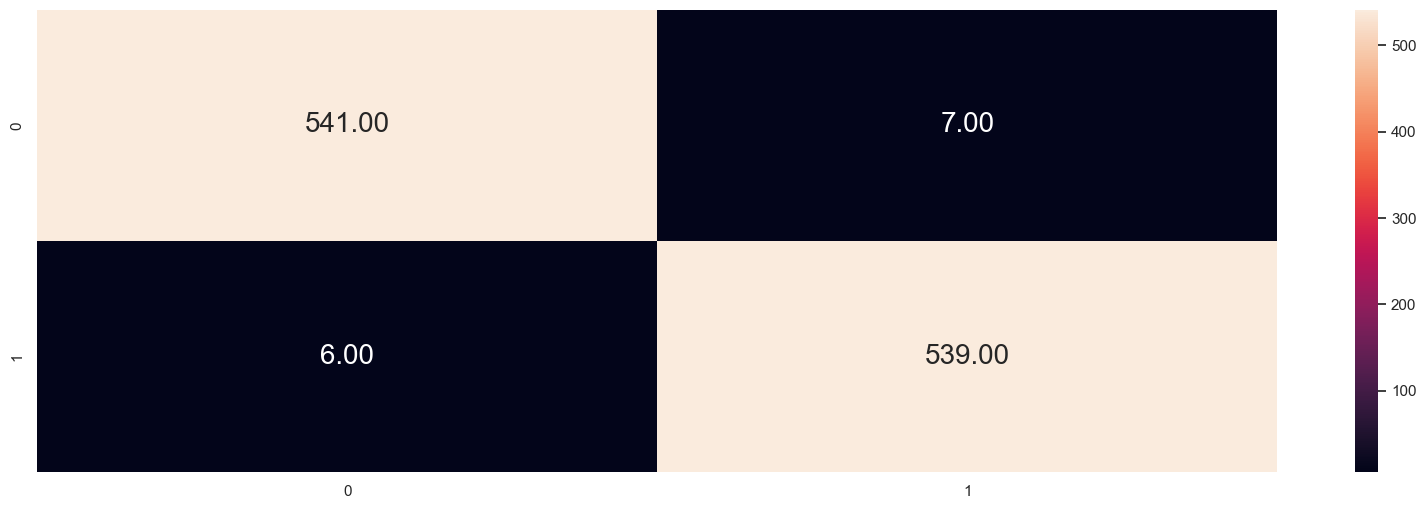

In [142]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

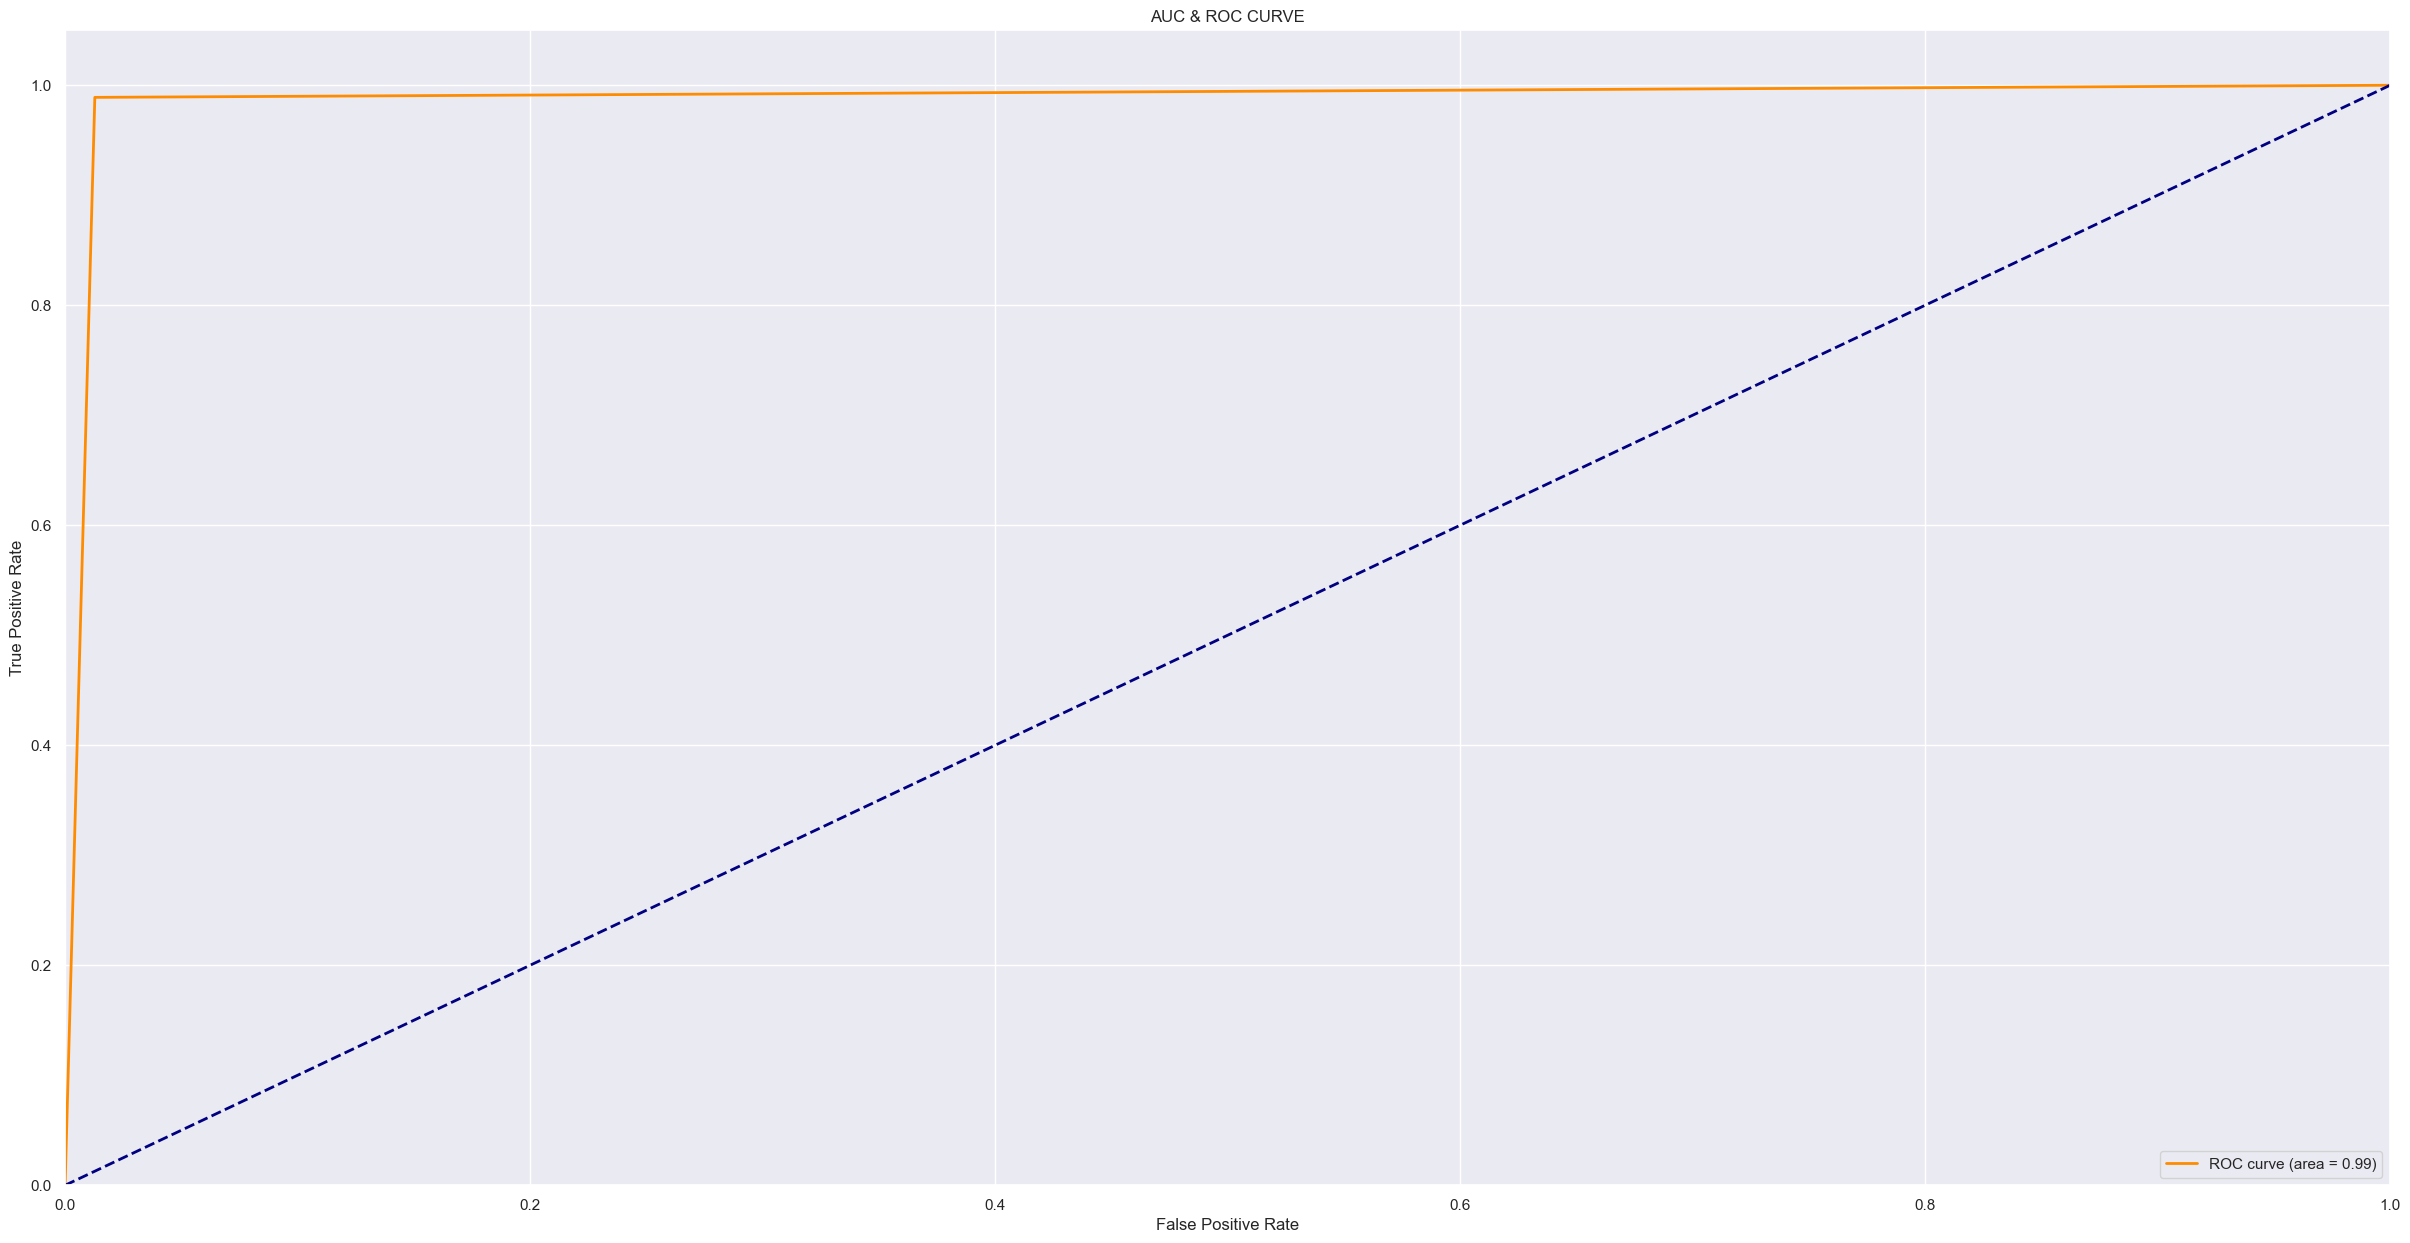

In [143]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [144]:
y_pred = boost.predict(x_test)
acc_xgb = accuracy_score(y_test, y_pred) * 100
pre_xgb = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_xgb = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_xgb = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_xgb}%")
print(f"Precision : {pre_xgb}%")
print(f"Recall : {recall_xgb}%")
print(f"F1 Score : {f1_xgb}%")

Accuracy: 97.01492537313433%
Precision : 97.05282702879819%
Recall : 97.00661962610025%
F1 Score : 97.01382572312171%


<Axes: >

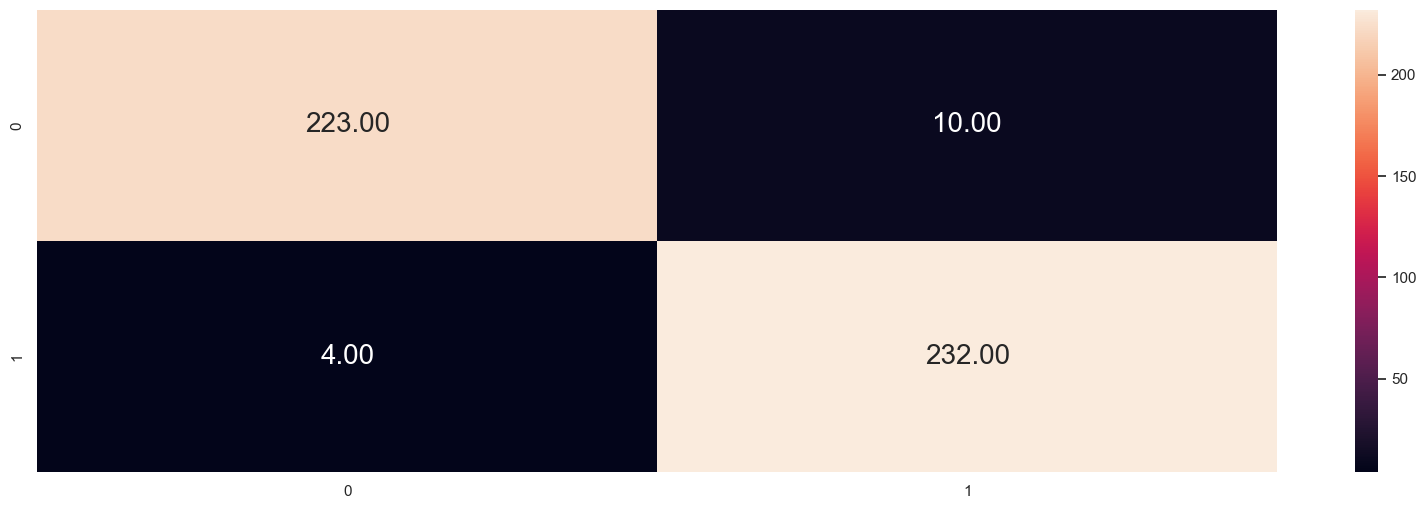

In [145]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

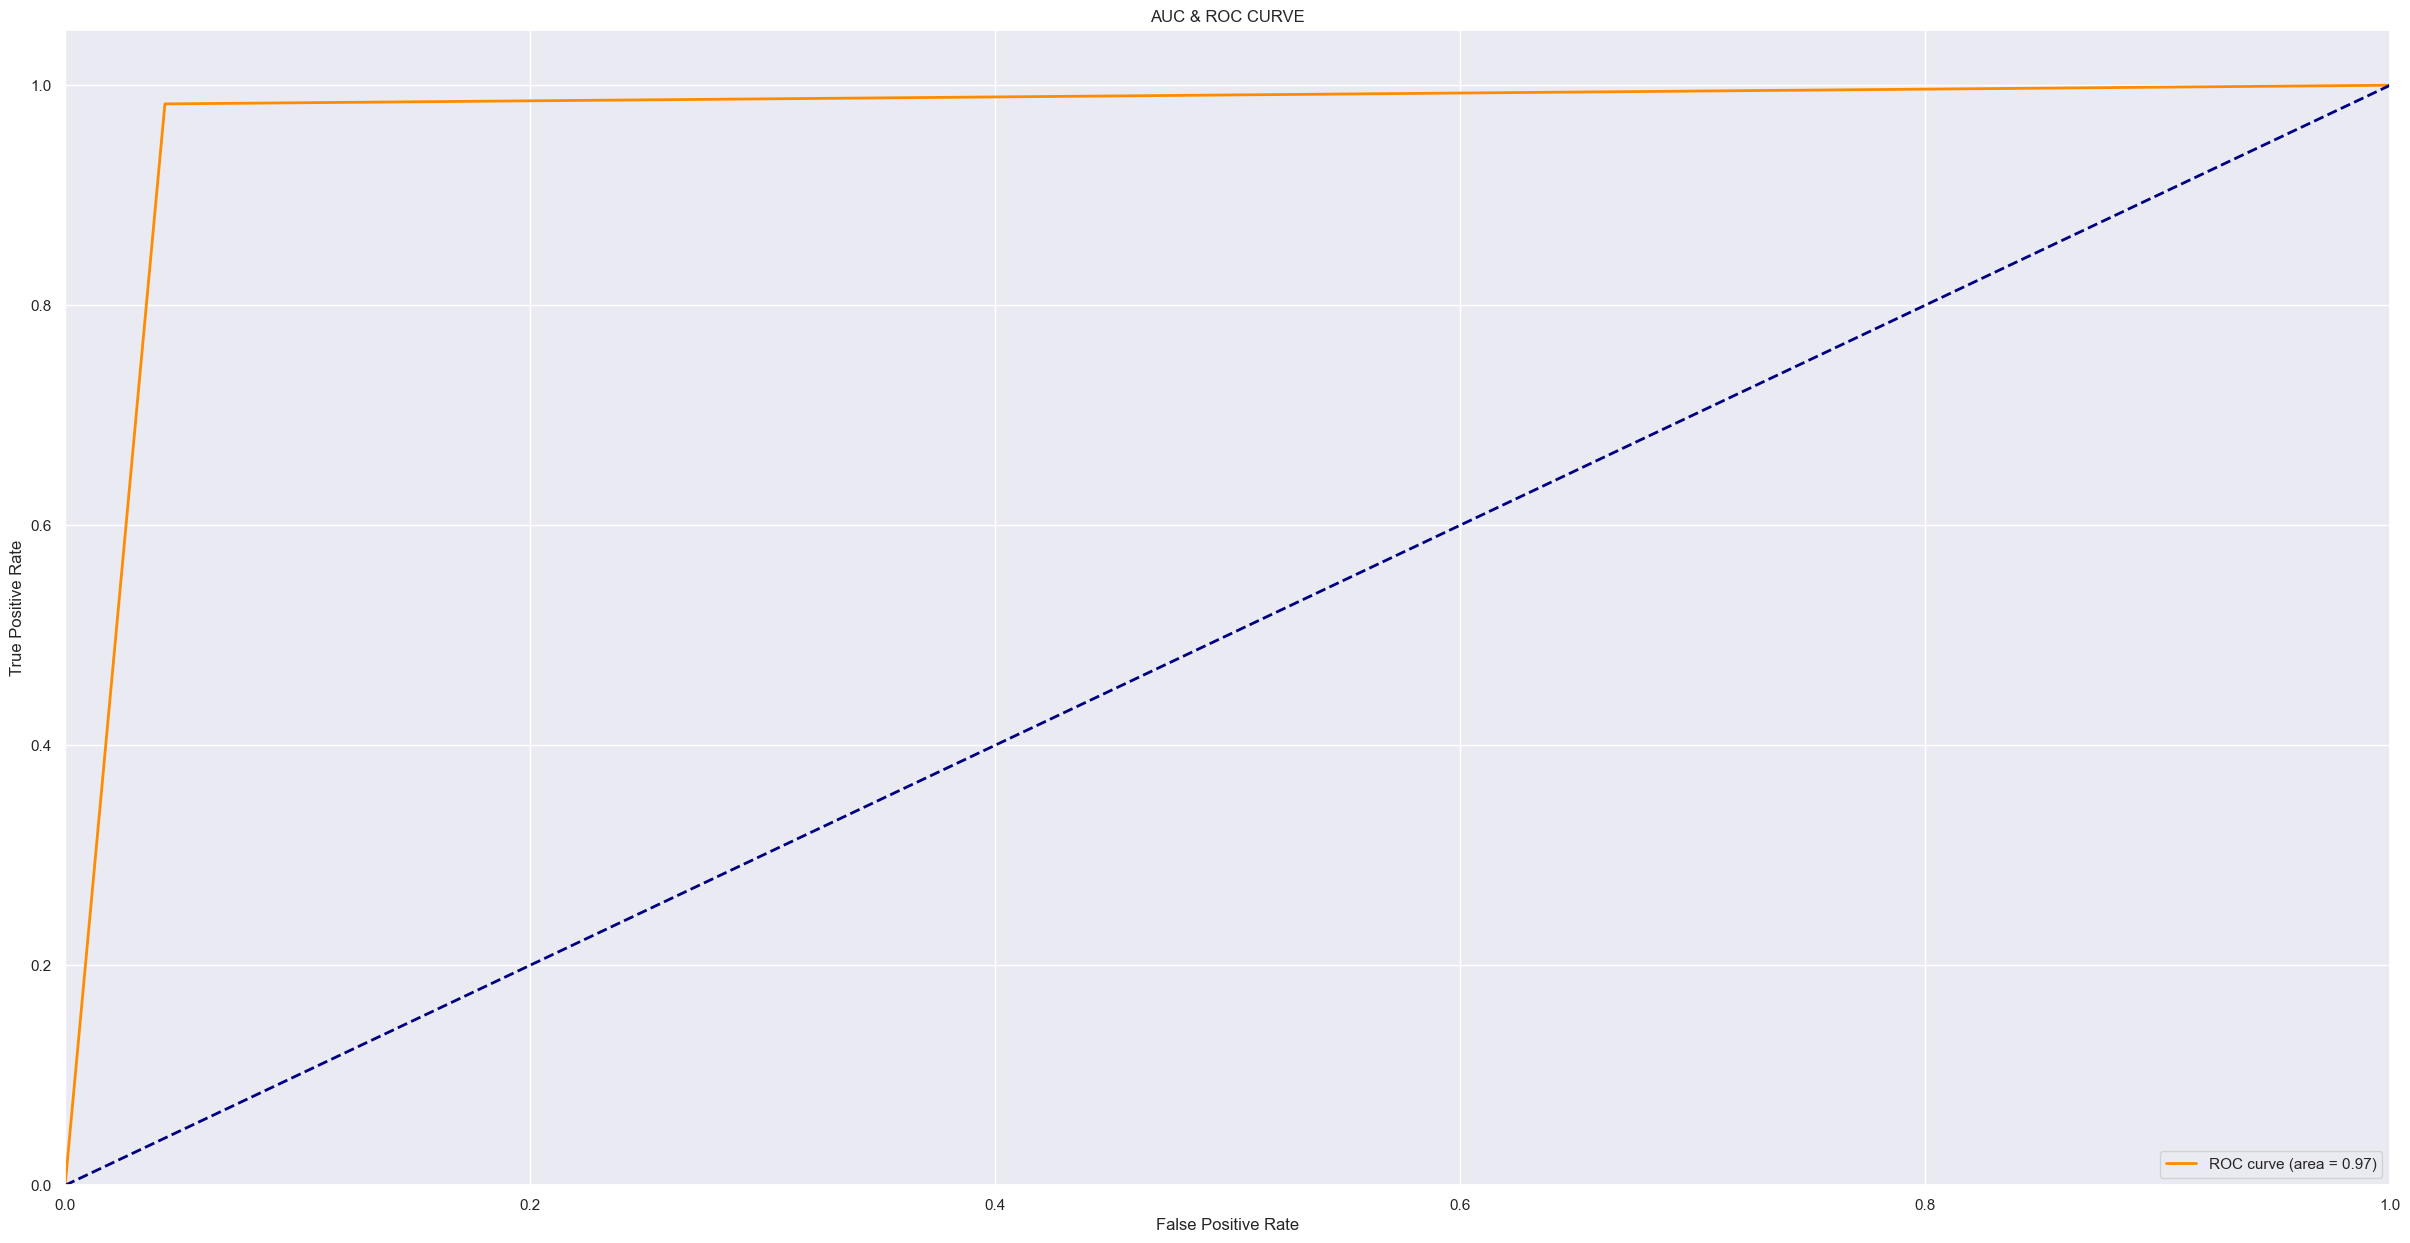

In [146]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Hyper parameter Tuning**

##### **Stacking Classifier**

In [58]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('adb', AdaBoostClassifier(random_state=42))
]

# Define stacking classifier with final meta-classifier
STC = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

param_grid = {
    'rf__n_estimators': [100, 200, 300],  # Expand range for RandomForestClassifier
    'rf__max_depth': [None, 10, 20, 30],  # Add max_depth for RandomForestClassifier

    'adb__n_estimators': [50, 100, 150],  # Expand range for AdaBoostClassifier
    'adb__learning_rate': [0.1, 0.5, 1.0],  # Add learning_rate for AdaBoostClassifier

    'final_estimator__C': [0.01, 0.1, 1.0],  # Expand range for LogisticRegression
    'final_estimator__solver': ['liblinear', 'lbfgs', 'sag'] # Add 'sag' solver for LogisticRegression   
}


# Grid search CV
grid_search = RandomizedSearchCV(estimator=STC, param_distributions=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit grid search
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'rf__n_estimators': 300, 'rf__max_depth': 10, 'final_estimator__solver': 'liblinear', 'final_estimator__C': 0.01, 'adb__n_estimators': 100, 'adb__learning_rate': 0.5}


In [59]:
# Base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42, max_depth=300)),
    ('adb', AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=0.5))
]

# Meta classifier
meta_classifier = LogisticRegression(random_state=42, C=0.1, solver='liblinear')

# Stacking classifier
STC_hyp = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train stacking classifier
STC_hyp.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=300,
                                                       n_estimators=300,
                                                       random_state=42)),
                               ('adb',
                                AdaBoostClassifier(learning_rate=0.5,
                                                   n_estimators=100,
                                                   random_state=42))],
                   final_estimator=LogisticRegression(C=0.1, random_state=42,
                                                      solver='liblinear'))

In [60]:
y_pred = STC_hyp.predict(x_train)
acc_stc_hyp = accuracy_score(y_train, y_pred) * 100
pre_stc_hyp = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_stc_hyp = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_stc_hyp = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_stc_hyp}%")
print(f"Precision : {pre_stc_hyp}%")
print(f"Recall : {recall_stc_hyp}%")
print(f"F1 Score : {f1_stc_hyp}%")

Accuracy: 100.0%
Precision : 100.0%
Recall : 100.0%
F1 Score : 100.0%


<Axes: >

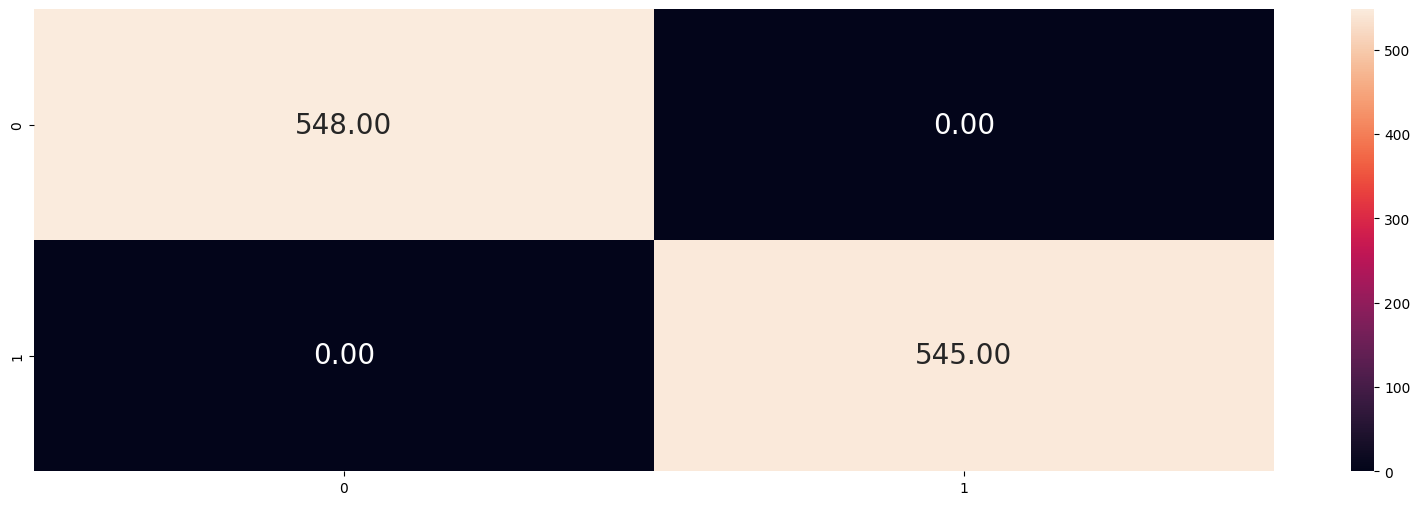

In [61]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

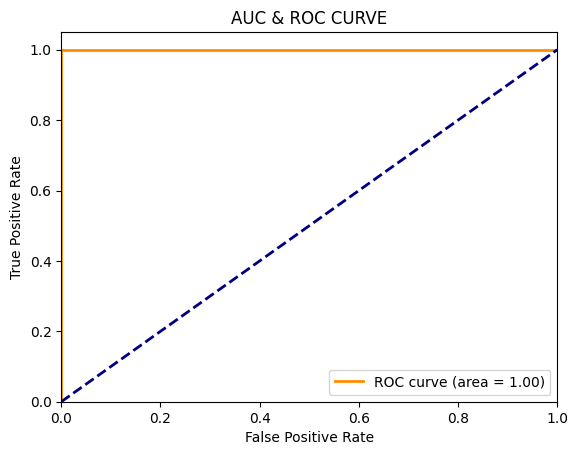

In [62]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [63]:
y_pred = STC_hyp.predict(x_test)
acc_stc_hyp = accuracy_score(y_test, y_pred) * 100
pre_stc_hyp = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_stc_hyp = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_stc_hyp = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_stc_hyp}%")
print(f"Precision : {pre_stc_hyp}%")
print(f"Recall : {recall_stc_hyp}%")
print(f"F1 Score : {f1_stc_hyp}%")

Accuracy: 97.01492537313433%
Precision : 97.02062643239114%
Recall : 97.01207536189713%
F1 Score : 97.01458606139968%


<Axes: >

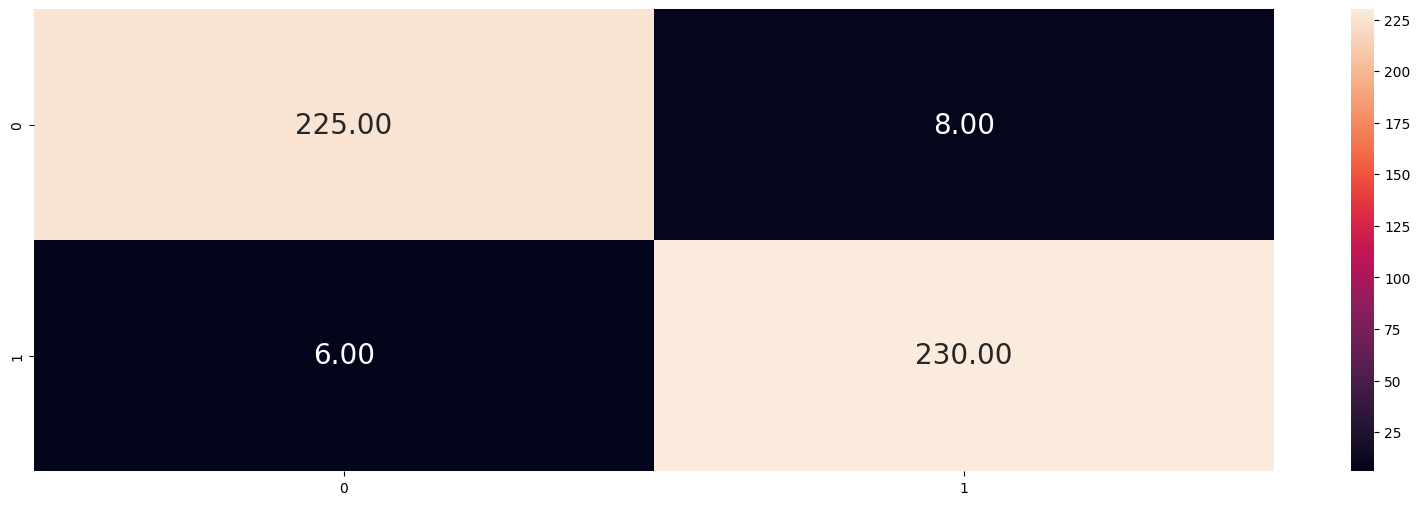

In [64]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

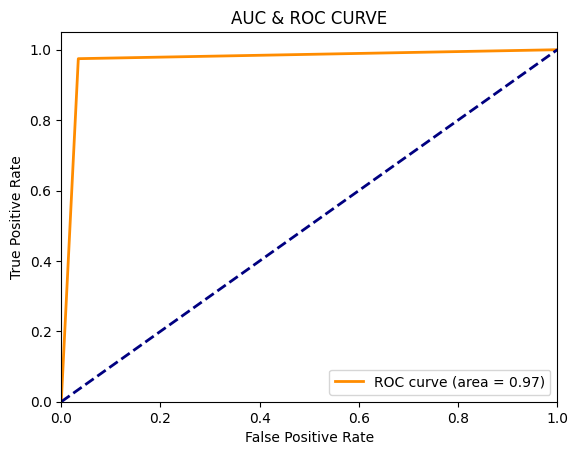

In [65]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Accuracy Graph**

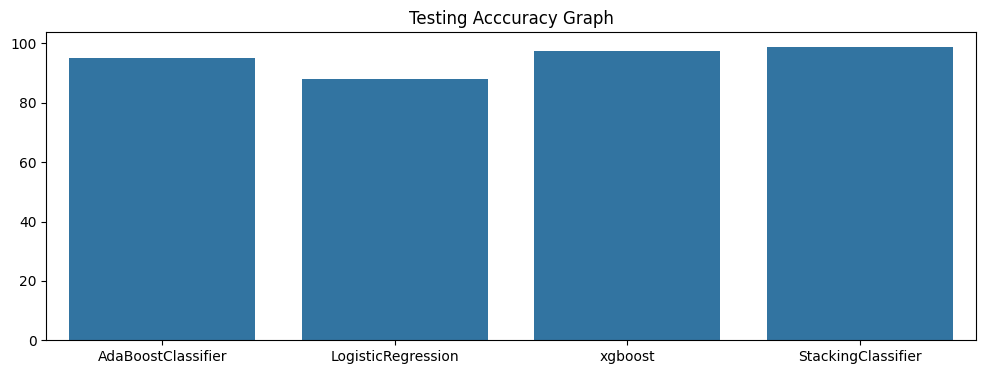

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

Algorithm = ['AdaBoostClassifier', 'LogisticRegression', 'xgboost', 'StackingClassifier']
Accuracy = [95.09, 88.06, 97.44, 98.81]

plt.figure(figsize=(12,4))
sns.barplot(x = Algorithm, y = Accuracy)
plt.title("Testing Acccuracy Graph")
plt.show()

### **Existing System**

**K-Nearest Neighbor (KNN)**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(x_train)
acc_knn = accuracy_score(y_train, y_pred) * 100
pre_knn = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_knn = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_knn = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_knn}%")
print(f"Precision : {pre_knn}%")
print(f"Recall : {recall_knn}%")
print(f"F1 Score : {f1_knn}%")

Accuracy: 89.8444647758463%
Precision : 91.23638151834383%
Recall : 89.8697515569544%
F1 Score : 89.76216093059757%


<Axes: >

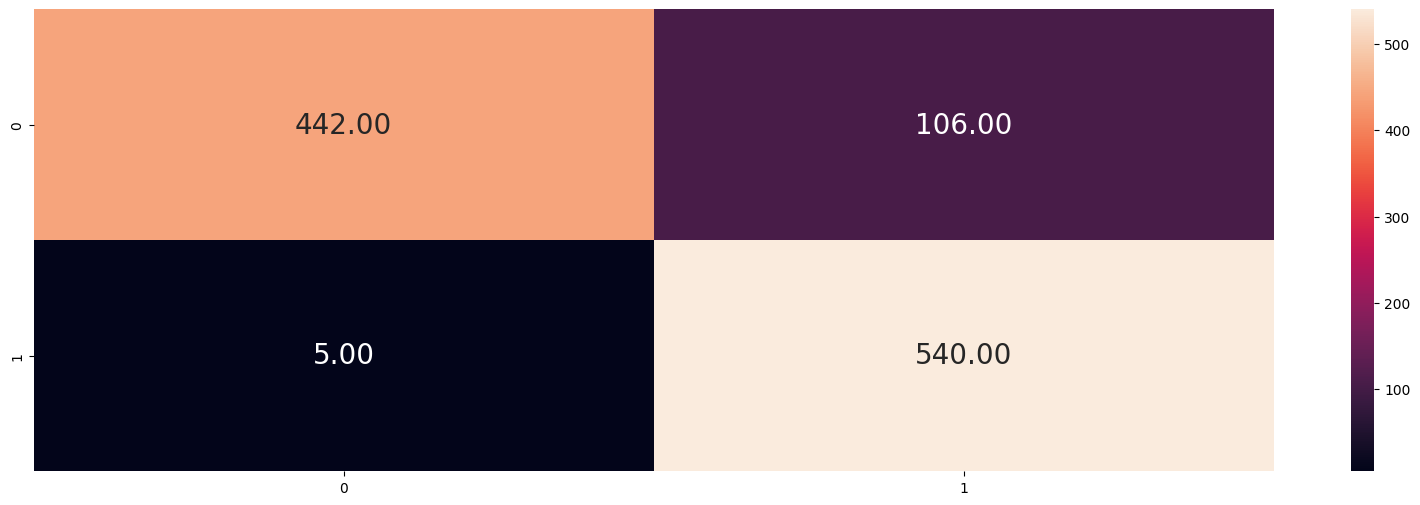

In [28]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

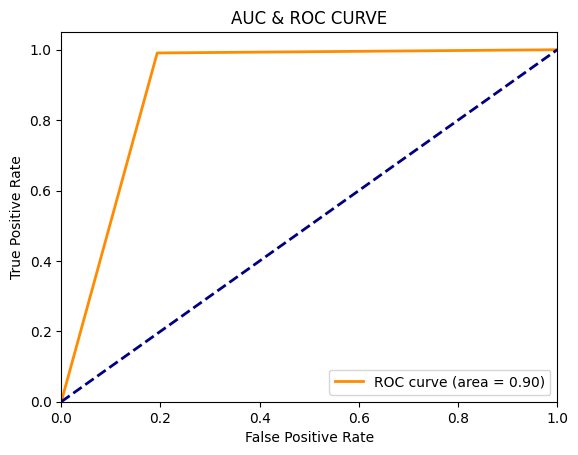

In [29]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [30]:
y_pred = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred) * 100
pre_knn = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_knn = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_knn = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_knn}%")
print(f"Precision : {pre_knn}%")
print(f"Recall : {recall_knn}%")
print(f"F1 Score : {f1_knn}%")

Accuracy: 86.78038379530916%
Precision : 88.7229511970534%
Recall : 86.70891830944933%
F1 Score : 86.59604676033486%


<Axes: >

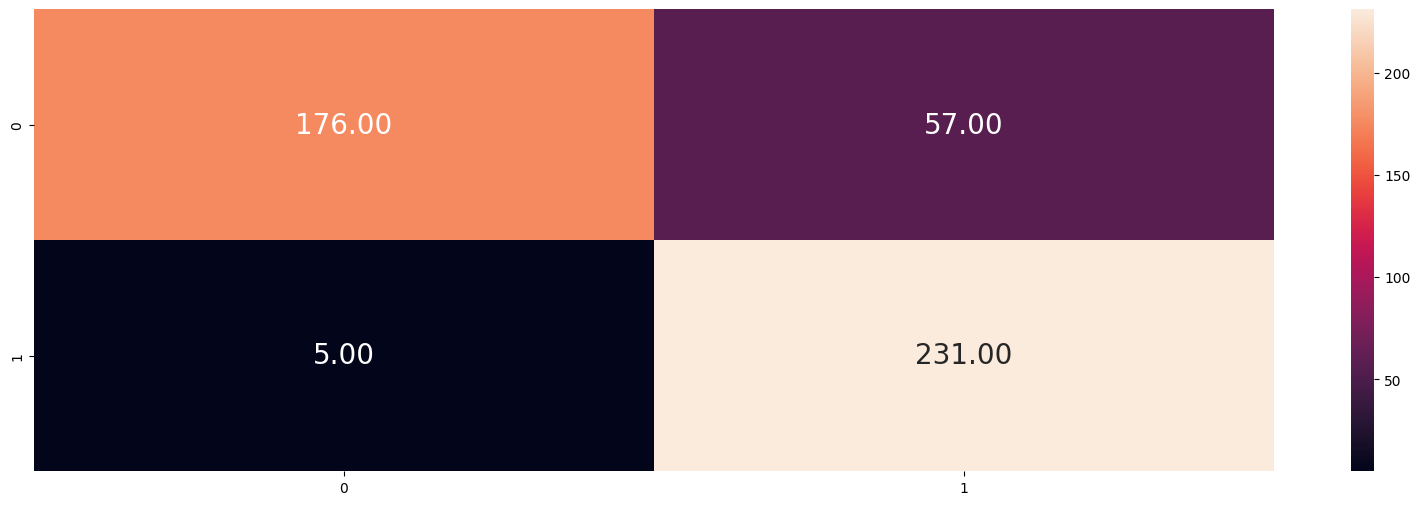

In [31]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

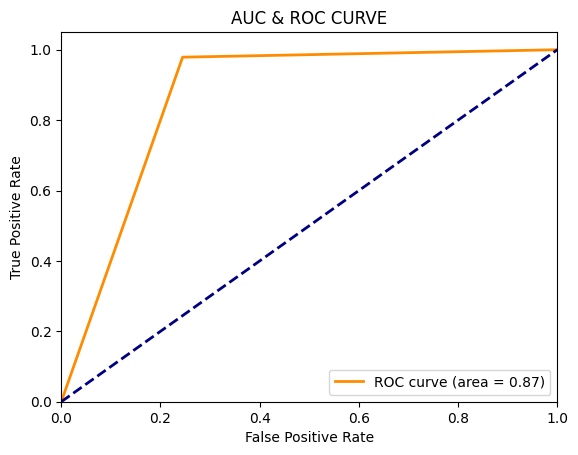

In [32]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Random Forest Classifier**

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
y_pred = rf.predict(x_train)
acc_rf = accuracy_score(y_train, y_pred) * 100
pre_rf = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_rf = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_rf = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_rf}%")
print(f"Precision : {pre_rf}%")
print(f"Recall : {recall_rf}%")
print(f"F1 Score : {f1_rf}%")

Accuracy: 100.0%
Precision : 100.0%
Recall : 100.0%
F1 Score : 100.0%


<Axes: >

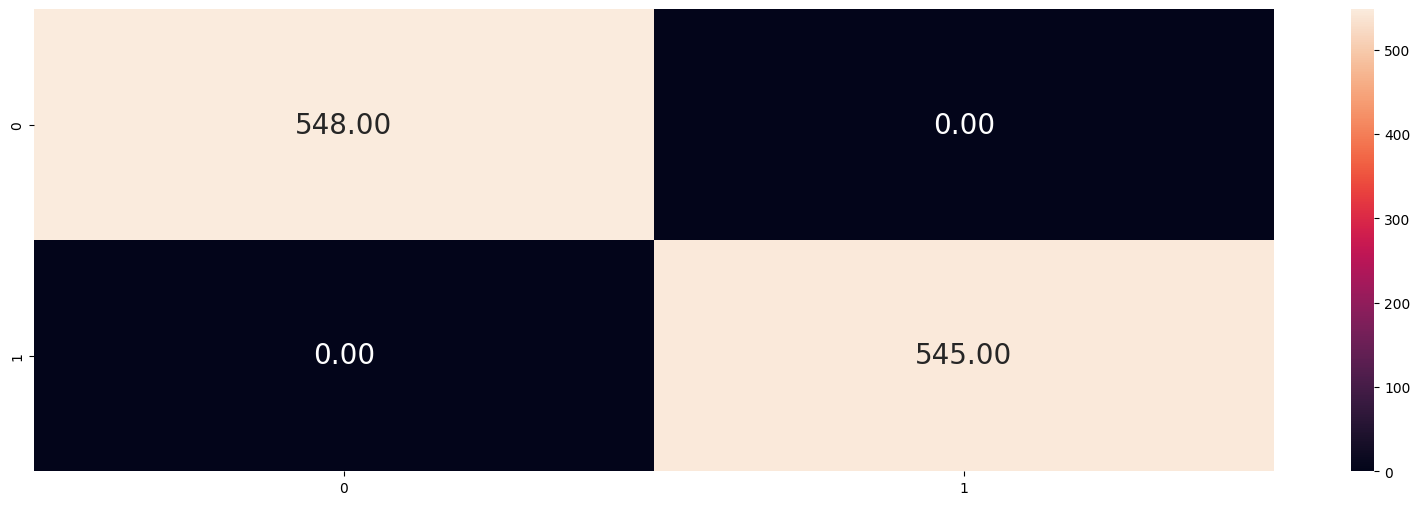

In [35]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

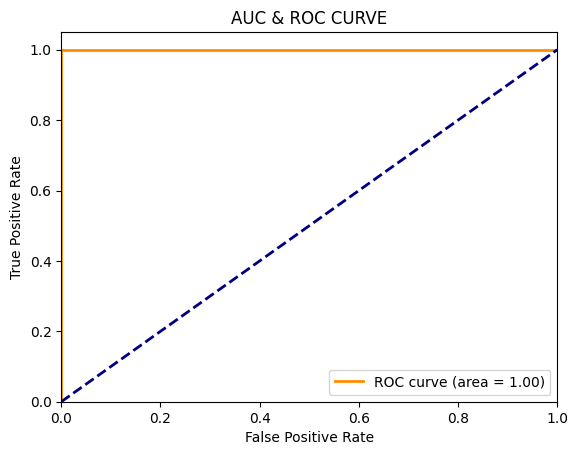

In [36]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [37]:
y_pred = rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred) * 100
pre_rf = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_rf = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_rf = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_rf}%")
print(f"Precision : {pre_rf}%")
print(f"Recall : {recall_rf}%")
print(f"F1 Score : {f1_rf}%")

Accuracy: 96.37526652452026%
Precision : 96.37479541734861%
Recall : 96.37648214155816%
F1 Score : 96.37520060739145%


<Axes: >

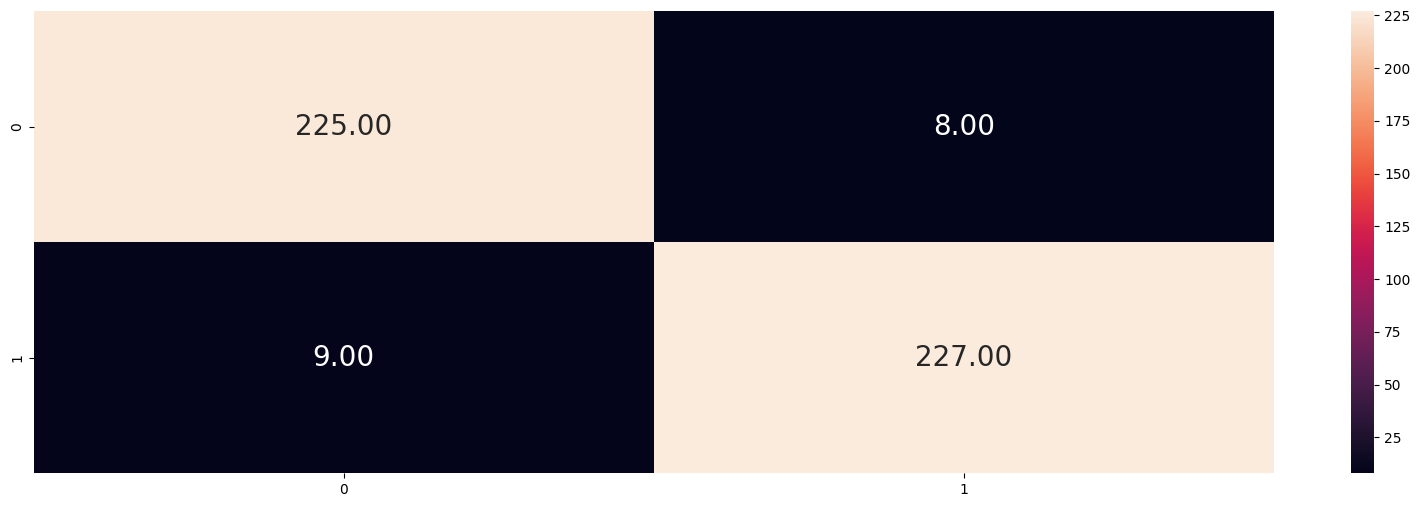

In [38]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

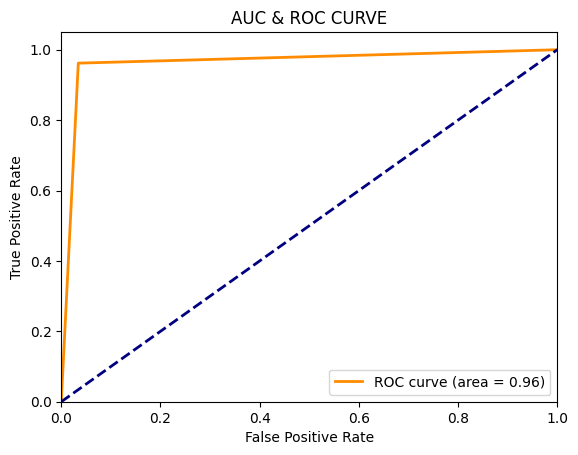

In [39]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Decision Tree**

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = dt.predict(x_train)
acc_dt = accuracy_score(y_train, y_pred) * 100
pre_dt = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_dt = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_dt = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_dt}%")
print(f"Precision : {pre_dt}%")
print(f"Recall : {recall_dt}%")
print(f"F1 Score : {f1_dt}%")

Accuracy: 100.0%
Precision : 100.0%
Recall : 100.0%
F1 Score : 100.0%


<Axes: >

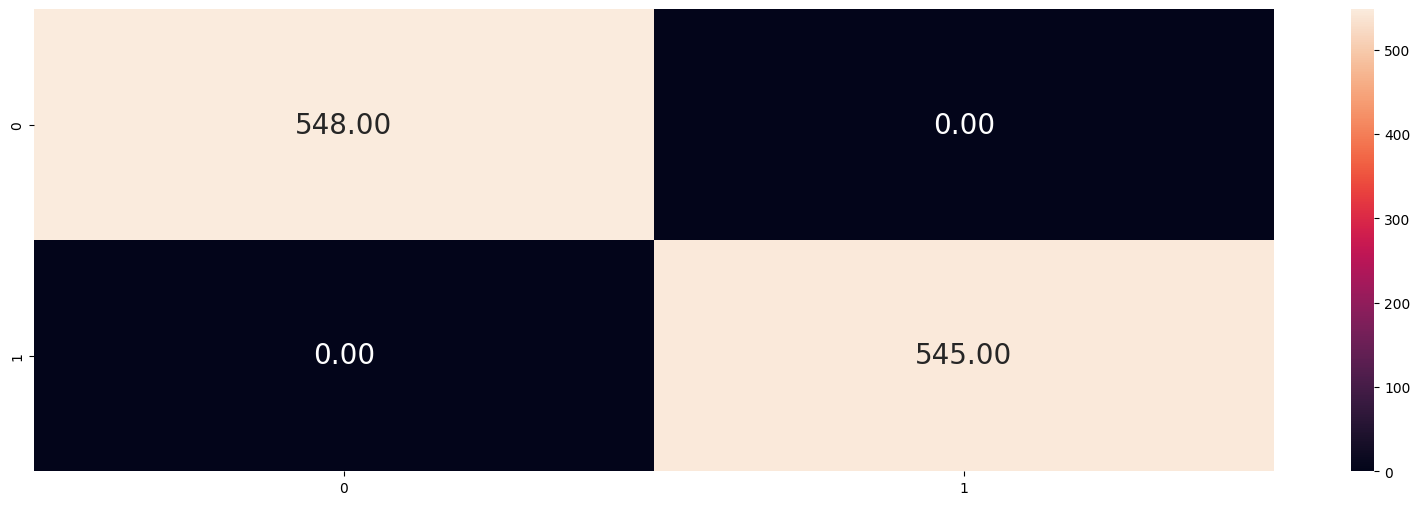

In [42]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

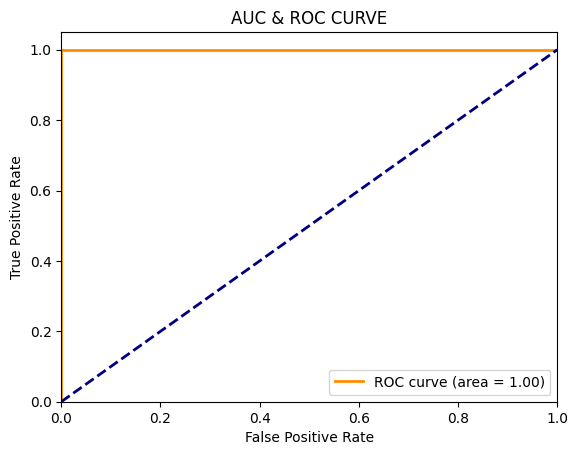

In [43]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [44]:
y_pred = dt.predict(x_test)
acc_dt = accuracy_score(y_test, y_pred) * 100
pre_dt = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_dt = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_dt = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_dt}%")
print(f"Precision : {pre_dt}%")
print(f"Recall : {recall_dt}%")
print(f"F1 Score : {f1_dt}%")

Accuracy: 94.66950959488273%
Precision : 94.66903073286052%
Recall : 94.67065541572707%
F1 Score : 94.66941265792859%


<Axes: >

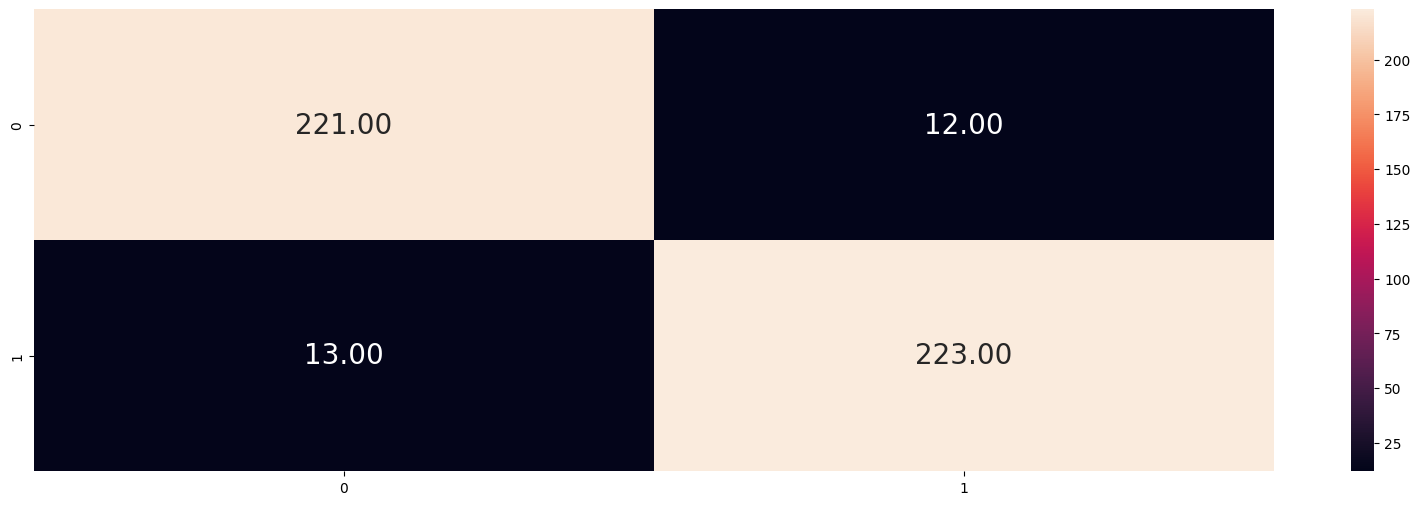

In [45]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

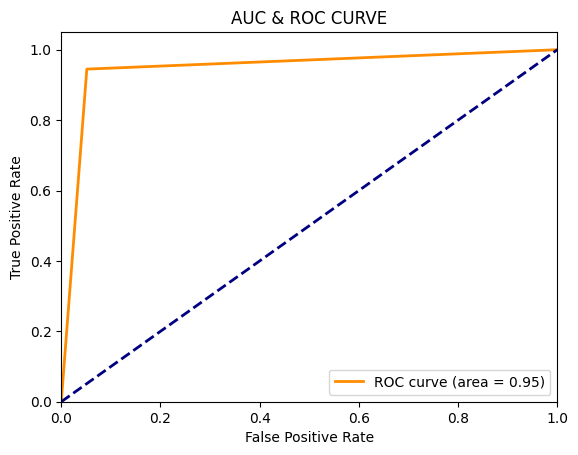

In [46]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine (SVM)**

In [47]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [48]:
y_pred = svm.predict(x_train)
acc_svm = accuracy_score(y_train, y_pred) * 100
pre_svm = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_svm = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_svm = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_svm}%")
print(f"Precision : {pre_svm}%")
print(f"Recall : {recall_svm}%")
print(f"F1 Score : {f1_svm}%")

Accuracy: 68.16102470265325%
Precision : 74.87934718538168%
Recall : 68.08946628272953%
F1 Score : 65.80321501780126%


<Axes: >

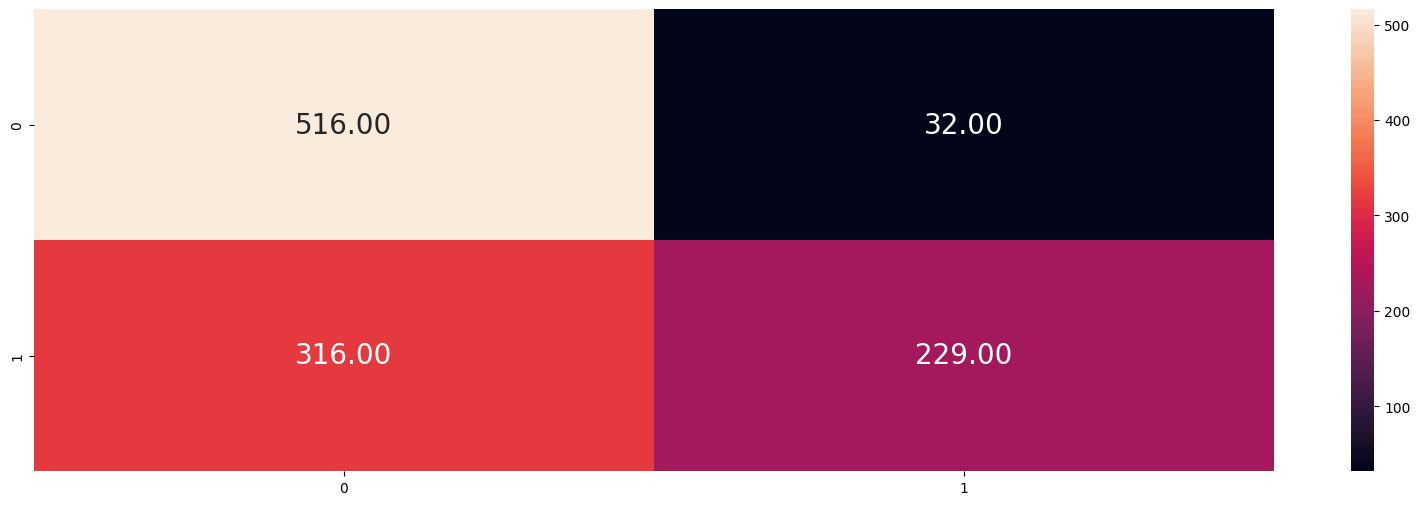

In [49]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_train, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

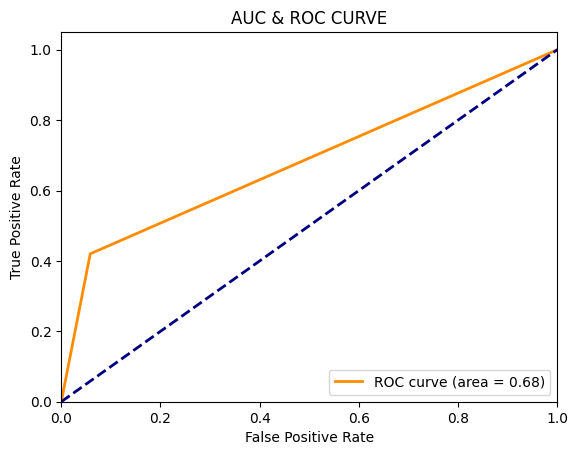

In [50]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [51]:
y_pred = svm.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred) * 100
pre_svm = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_svm = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_svm = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_svm}%")
print(f"Precision : {pre_svm}%")
print(f"Recall : {recall_svm}%")
print(f"F1 Score : {f1_svm}%")

Accuracy: 66.73773987206823%
Precision : 73.24929971988794%
Recall : 66.90550665599767%
F1 Score : 64.36586791350088%


<Axes: >

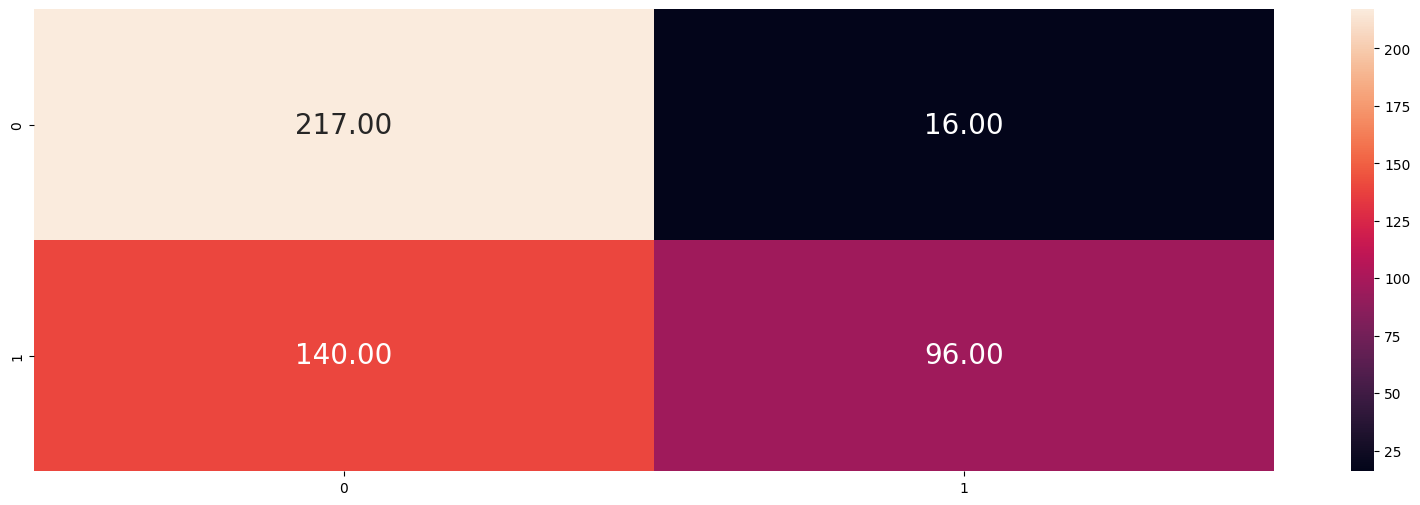

In [52]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

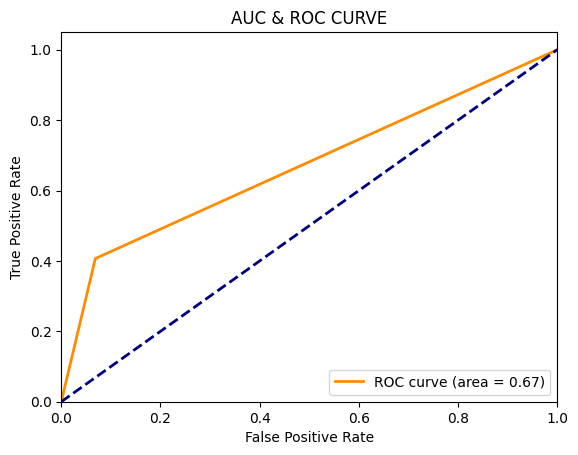

In [53]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC & ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Artificial Neural Network (ANN)**

In [54]:
x_train.shape

(1093, 15)

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initializing the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=15))  # 15 features, 64 neurons

# Adding a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Adding the second hidden layer
model.add(Dense(units=32, activation='relu'))

# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
35/35 [==============================] - 2s 15ms/step - loss: 0.9870 - accuracy: 0.5508 - val_loss: 0.7062 - val_accuracy: 0.5736
Epoch 2/10
35/35 [==============================] - 0s 6ms/step - loss: 0.8181 - accuracy: 0.5215 - val_loss: 0.6833 - val_accuracy: 0.6226
Epoch 3/10
35/35 [==============================] - 0s 6ms/step - loss: 0.7727 - accuracy: 0.5124 - val_loss: 0.6875 - val_accuracy: 0.5778
Epoch 4/10
35/35 [==============================] - 0s 9ms/step - loss: 0.7443 - accuracy: 0.5471 - val_loss: 0.6620 - val_accuracy: 0.6077
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.7163 - accuracy: 0.5618 - val_loss: 0.6509 - val_accuracy: 0.6674
Epoch 6/10
35/35 [==============================] - 0s 4ms/step - loss: 0.7134 - accuracy: 0.5480 - val_loss: 0.6470 - val_accuracy: 0.6333
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6798 - accuracy: 0.5755 - val_loss: 0.6201 - val_accuracy: 0.7356
Epoch 8/10
35/35 [=

In [56]:
# Evaluating the model
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')
# Making predictions
predictions = model.predict(x_train)

35/35 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.8243
Loss: 0.5476173758506775, Accuracy: 0.8243367075920105
35/35 [==============================] - 0s 2ms/step


In [57]:
# Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
# Making predictions
predictions = model.predict(x_test)

15/15 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.7932
Loss: 0.5601896643638611, Accuracy: 0.7931769490242004
15/15 [==============================] - 0s 2ms/step


AttributeError: 'Flags' object has no attribute 'c_contiguous'AttributeError: 'Flags' object has no attribute 'c_contiguous'